# Exploratory Data Analysis

In [46]:
import sys
import pandas as pd
sys.path.append("../")
import warnings
warnings.filterwarnings("ignore")
from utils.visualizations import Visualization

# Data

In [47]:
df = pd.read_csv("./Data/clean_payments_final")
print(f"Shape: {df.shape}")
df.head()

Shape: (77414, 17)


,ID_CLIENTE,SAFRA_REF,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,VALOR_A_PAGAR,TAXA,DATA_CADASTRO,DDD,FLAG_PF,SEGMENTO_INDUSTRIAL,DOMINIO_EMAIL,PORTE,CEP_2_DIG,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS,INADIMPLENTE
0,1661240395903230676,2018-08,2018-08-17,2018-09-06,2018-09-06,35516.41,6.99,2013-08-22,Nordeste,0,Serviços,YAHOO,PEQUENO,Nordeste,252109.0,99.0,0
1,1661240395903230676,2018-08,2018-08-19,2018-09-11,2018-09-10,17758.21,6.99,2013-08-22,Nordeste,0,Serviços,YAHOO,PEQUENO,Nordeste,252109.0,99.0,0
2,1661240395903230676,2018-08,2018-08-26,2018-09-18,2018-09-17,17431.96,6.99,2013-08-22,Nordeste,0,Serviços,YAHOO,PEQUENO,Nordeste,252109.0,99.0,0
3,1661240395903230676,2018-08,2018-08-30,2018-10-11,2018-10-05,1341.00,6.99,2013-08-22,Nordeste,0,Serviços,YAHOO,PEQUENO,Nordeste,252109.0,99.0,1
4,1661240395903230676,2018-08,2018-08-31,2018-09-20,2018-09-20,21309.85,6.99,2013-08-22,Nordeste,0,Serviços,YAHOO,PEQUENO,Nordeste,252109.0,99.0,0


### To have a solid EDA with this dataset, the date columns have to be transformed from object to datetime. Also, the column `DATA_PAGAMENTO` will be dropped, since it's only use case was to help create the target variable. If this column were to be used in any point going forward, it could possibly result in a data leakage, which would hurt the model

In [48]:
df["SAFRA_REF"] = pd.to_datetime(df["SAFRA_REF"])
df["DATA_EMISSAO_DOCUMENTO"] = pd.to_datetime(df["DATA_EMISSAO_DOCUMENTO"])
df["DATA_VENCIMENTO"] = pd.to_datetime(df["DATA_VENCIMENTO"])
df["DATA_CADASTRO"] = pd.to_datetime(df["DATA_CADASTRO"])
df = df.drop(columns=["DATA_PAGAMENTO"])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77414 entries, 0 to 77413
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID_CLIENTE              77414 non-null  int64         
 1   SAFRA_REF               77414 non-null  datetime64[ns]
 2   DATA_EMISSAO_DOCUMENTO  77414 non-null  datetime64[ns]
 3   DATA_VENCIMENTO         77414 non-null  datetime64[ns]
 4   VALOR_A_PAGAR           77414 non-null  float64       
 5   TAXA                    77414 non-null  float64       
 6   DATA_CADASTRO           77414 non-null  datetime64[ns]
 7   DDD                     77414 non-null  object        
 8   FLAG_PF                 77414 non-null  int64         
 9   SEGMENTO_INDUSTRIAL     77414 non-null  object        
 10  DOMINIO_EMAIL           77414 non-null  object        
 11  PORTE                   77414 non-null  object        
 12  CEP_2_DIG               77414 non-null  object

In [50]:
visualizer = Visualization(df)

# Univariate Analysis

## Numerical Columns

In [51]:
numerical_columns = df.drop(columns=["ID_CLIENTE", "FLAG_PF", "INADIMPLENTE"]).select_dtypes(include="number").columns.to_list()
df[numerical_columns].describe()

,VALOR_A_PAGAR,TAXA,RENDA_MES_ANTERIOR,NO_FUNCIONARIOS
count,7.741400e+04,77414.000000,7.741400e+04,77414.000000
mean,4.656546e+04,6.789623,2.885797e+05,117.570033
std,4.633892e+04,1.798225,2.087422e+05,18.988792
min,1.000000e-01,4.990000,1.050000e+02,0.000000
25%,1.875275e+04,5.990000,1.375135e+05,105.000000
50%,3.475135e+04,5.990000,2.405020e+05,118.000000
75%,6.088421e+04,6.990000,3.856988e+05,130.000000
max,4.400000e+06,11.990000,1.682759e+06,198.000000


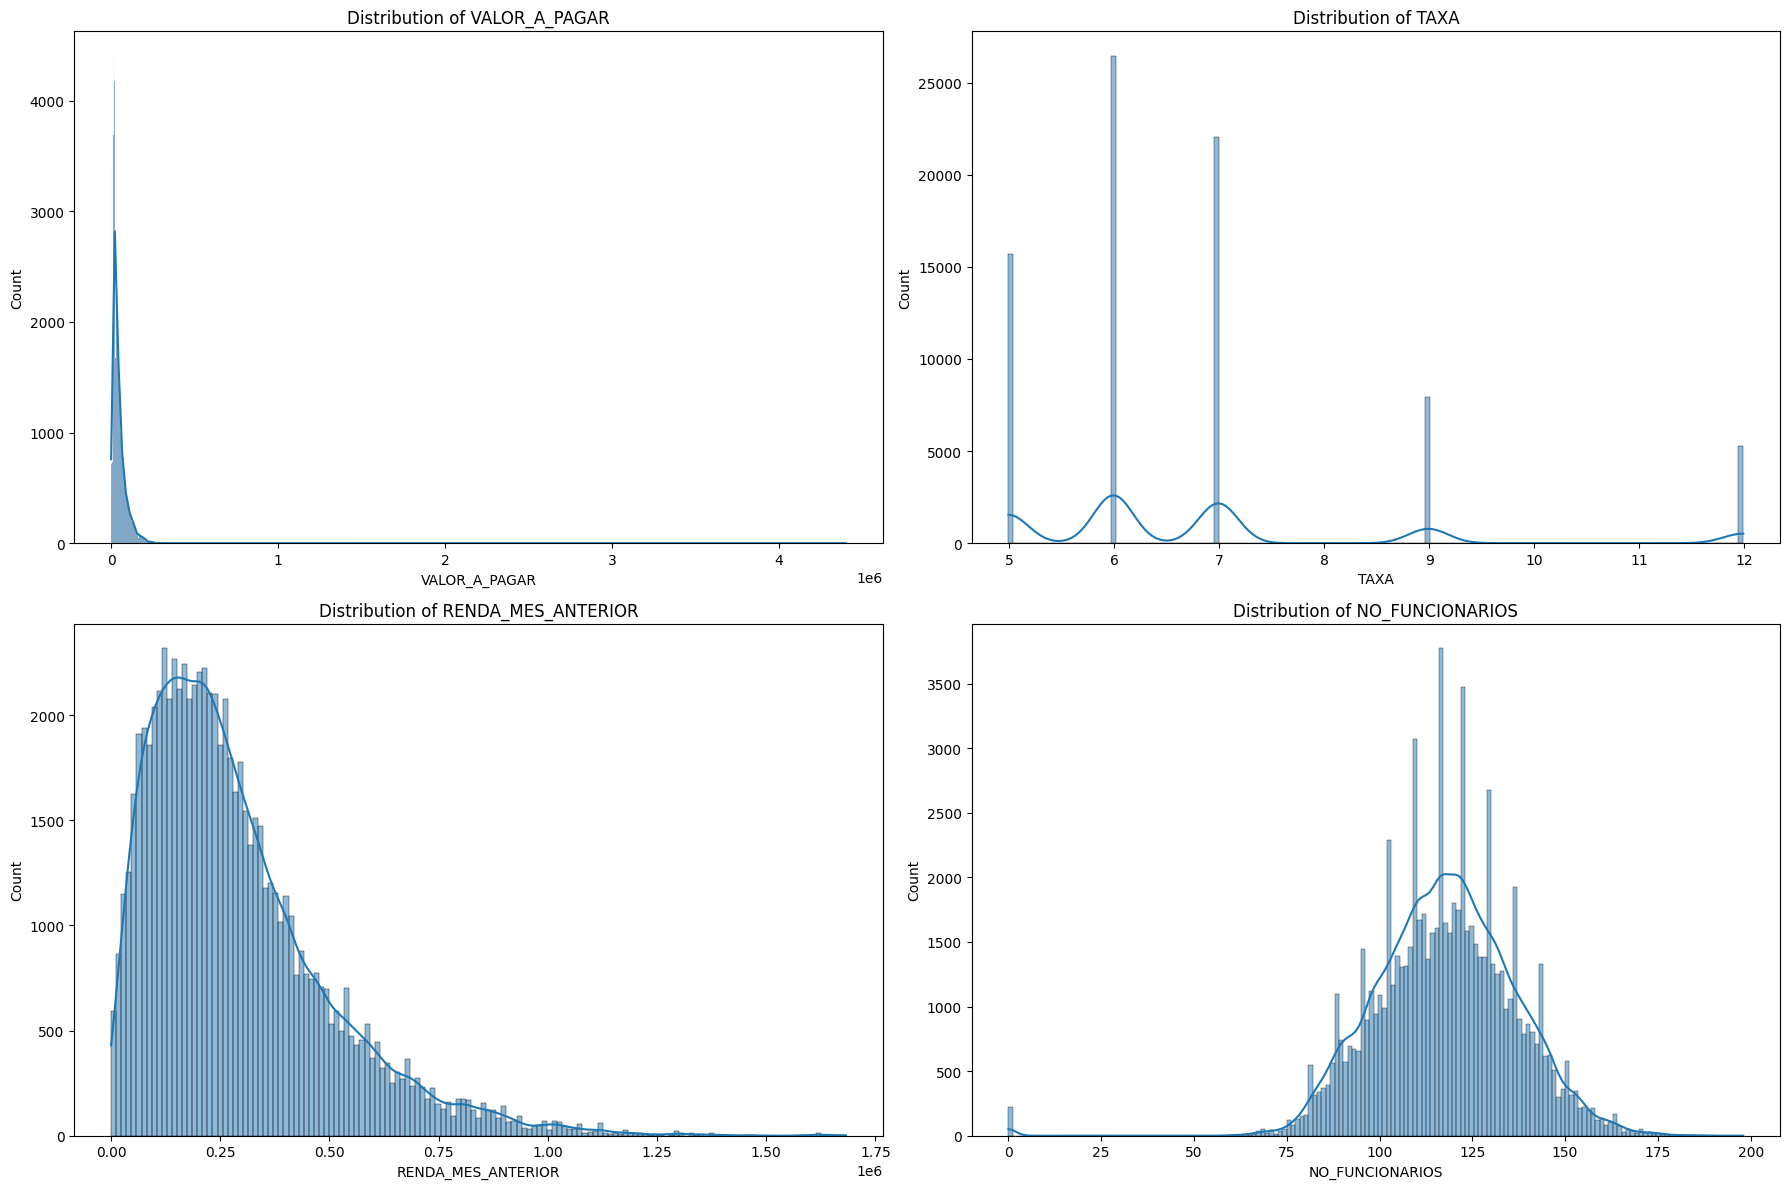

In [52]:
visualizer.num_univariate_analysis(numerical_columns, 2, 2)

In [53]:
df["INADIMPLENTE"].value_counts(normalize=True)

INADIMPLENTE
0    0.92978
1    0.07022
Name: proportion, dtype: float64

### Observations:
- `INADIMPLENTE` is extremely unbalanced, with almost 93% of all data on the **No** class, determined by the 0
- `VALOR_A_PAGAR` has a heavily positively skewed distribution, with mode < median < mean
- `TAXA` is a column with fixed values. Since these values are actual numbers that the clients paid for the transaction, it will be treated as a numerical feature
- `RENDA_MES_ANTERIOR` and `NO_FUNCIONARIOS` are well distributed, with the first one being a little positively skewed, and the latter one having a distribution similar to a normal one
- All columns besides `TAXA` have outliers
- The values of the columns are on different scales, with some columns getting as high as the millions
### Impact:
- In the future, some method of class balancing will be used in order to prevent the models from being extremely biased
- It would be interesting to test some methods to make the distributions of `VALOR_A_PAGAR` and `RENDA_MES_ANTERIOR` more closely resemble a gaussian one
- Scaling the data will be necessary for better results, but the scaler will be chosen after the columns are close to a gaussian distribution and taking into account the outliers

## Categorical Columns

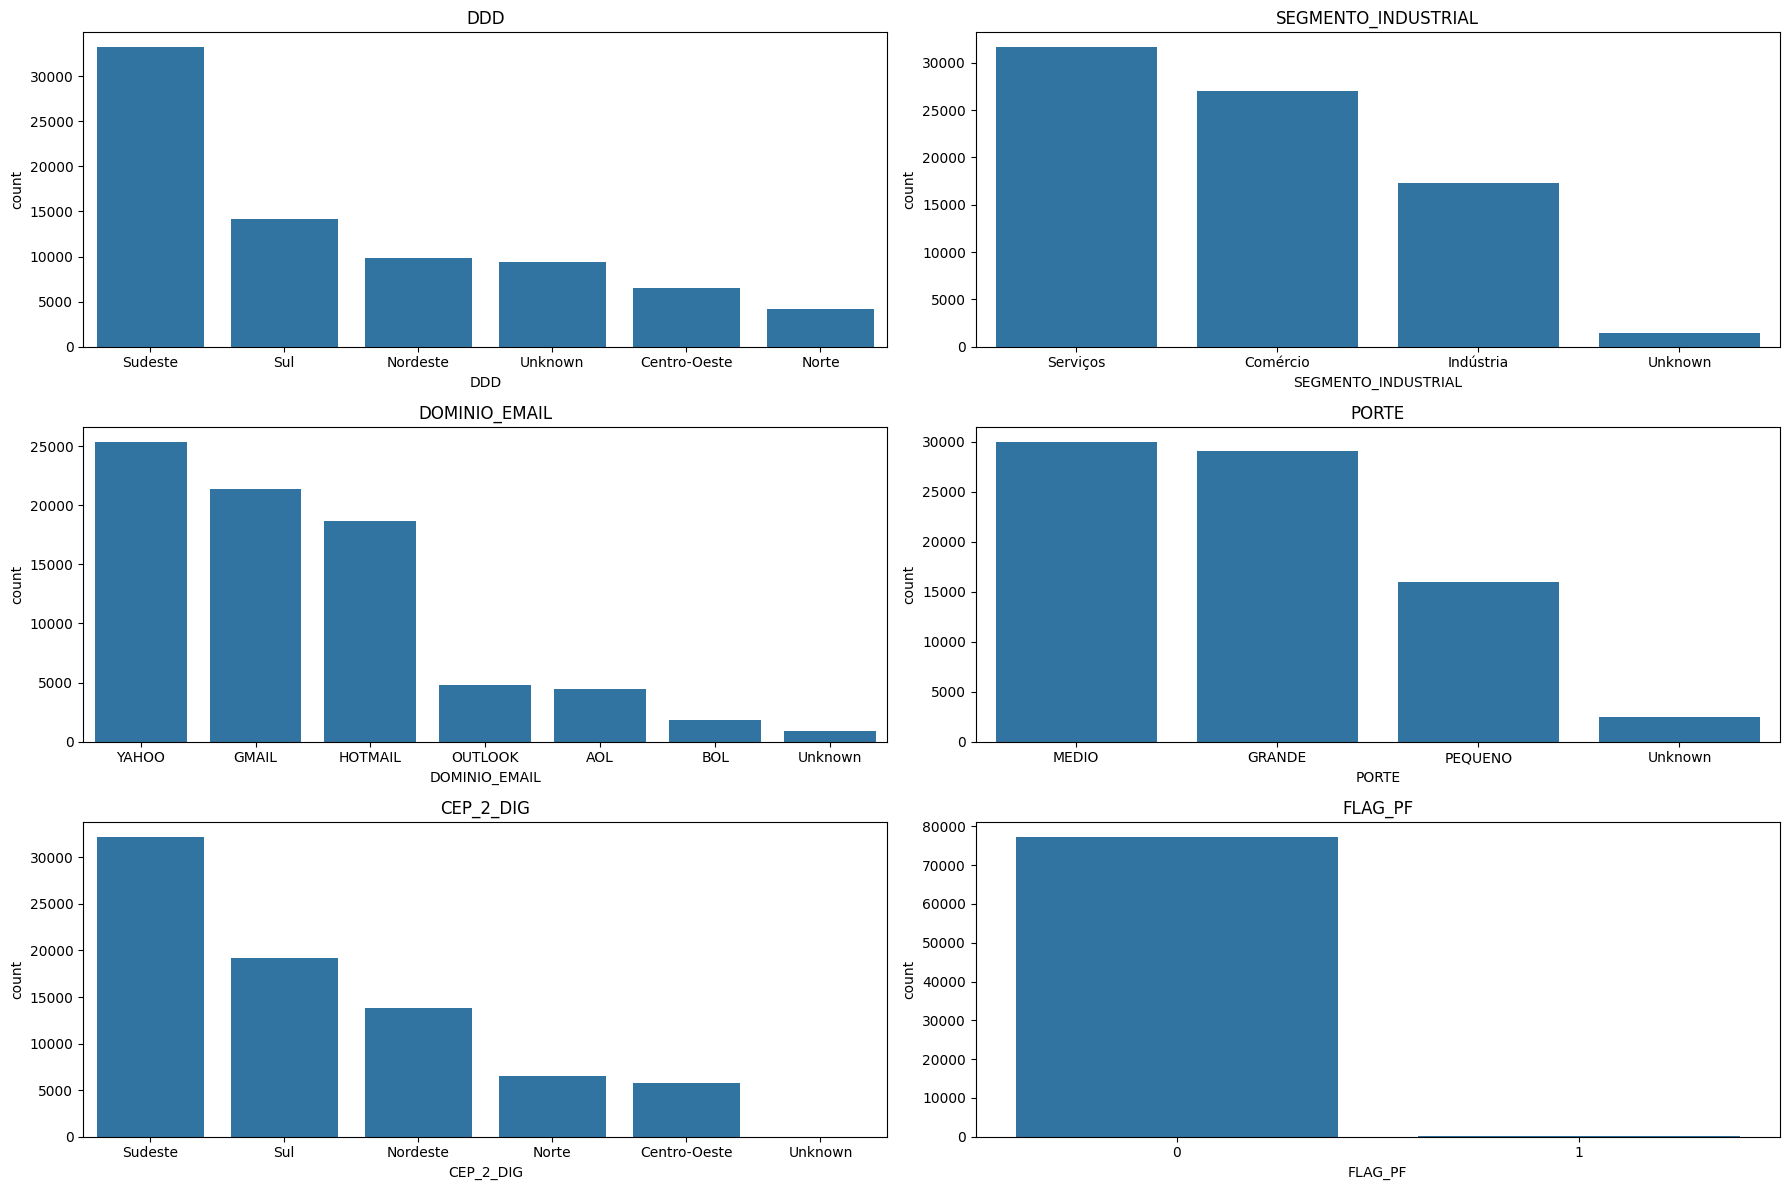

In [54]:
cat_columns = df.select_dtypes(include="object").columns.tolist() + ["FLAG_PF"]
visualizer.cat_univariate_analysis(cat_columns, 3, 2)

In [55]:
df["FLAG_PF"].value_counts(normalize=True)

FLAG_PF
0    0.997171
1    0.002829
Name: proportion, dtype: float64

### Observations:
- `DDD` and `CEP_2_DIG` show a similar behavior, with the majority of clients from **Sudeste**, that has more than double the amount of clients from any other region
- `SEGMENTO_INDUSTRIAL` has **Serviços** as the top one, with **Comercio** not too far behind
- `DOMINIO_EMAIL` shows that the top three are the most famous ones, and also, that they dominate by a lot, with the third most used domain **Hotmail** having almost four times the use of the next domain
- `PORTE` makes it clear that medium and large size companies are the great majority of clients
- `FLAG_PF` is extremely unbalanced, with 99.7% of all data in the **0** category
### Impact:
- In a first view, there's not enough variance in `FLAG_PF` to justify its use for the model training, so this column can probably be dropped. The EDA will continue to use the column, and the final verdict will be done by the end of the analysis

## Datetime Columns

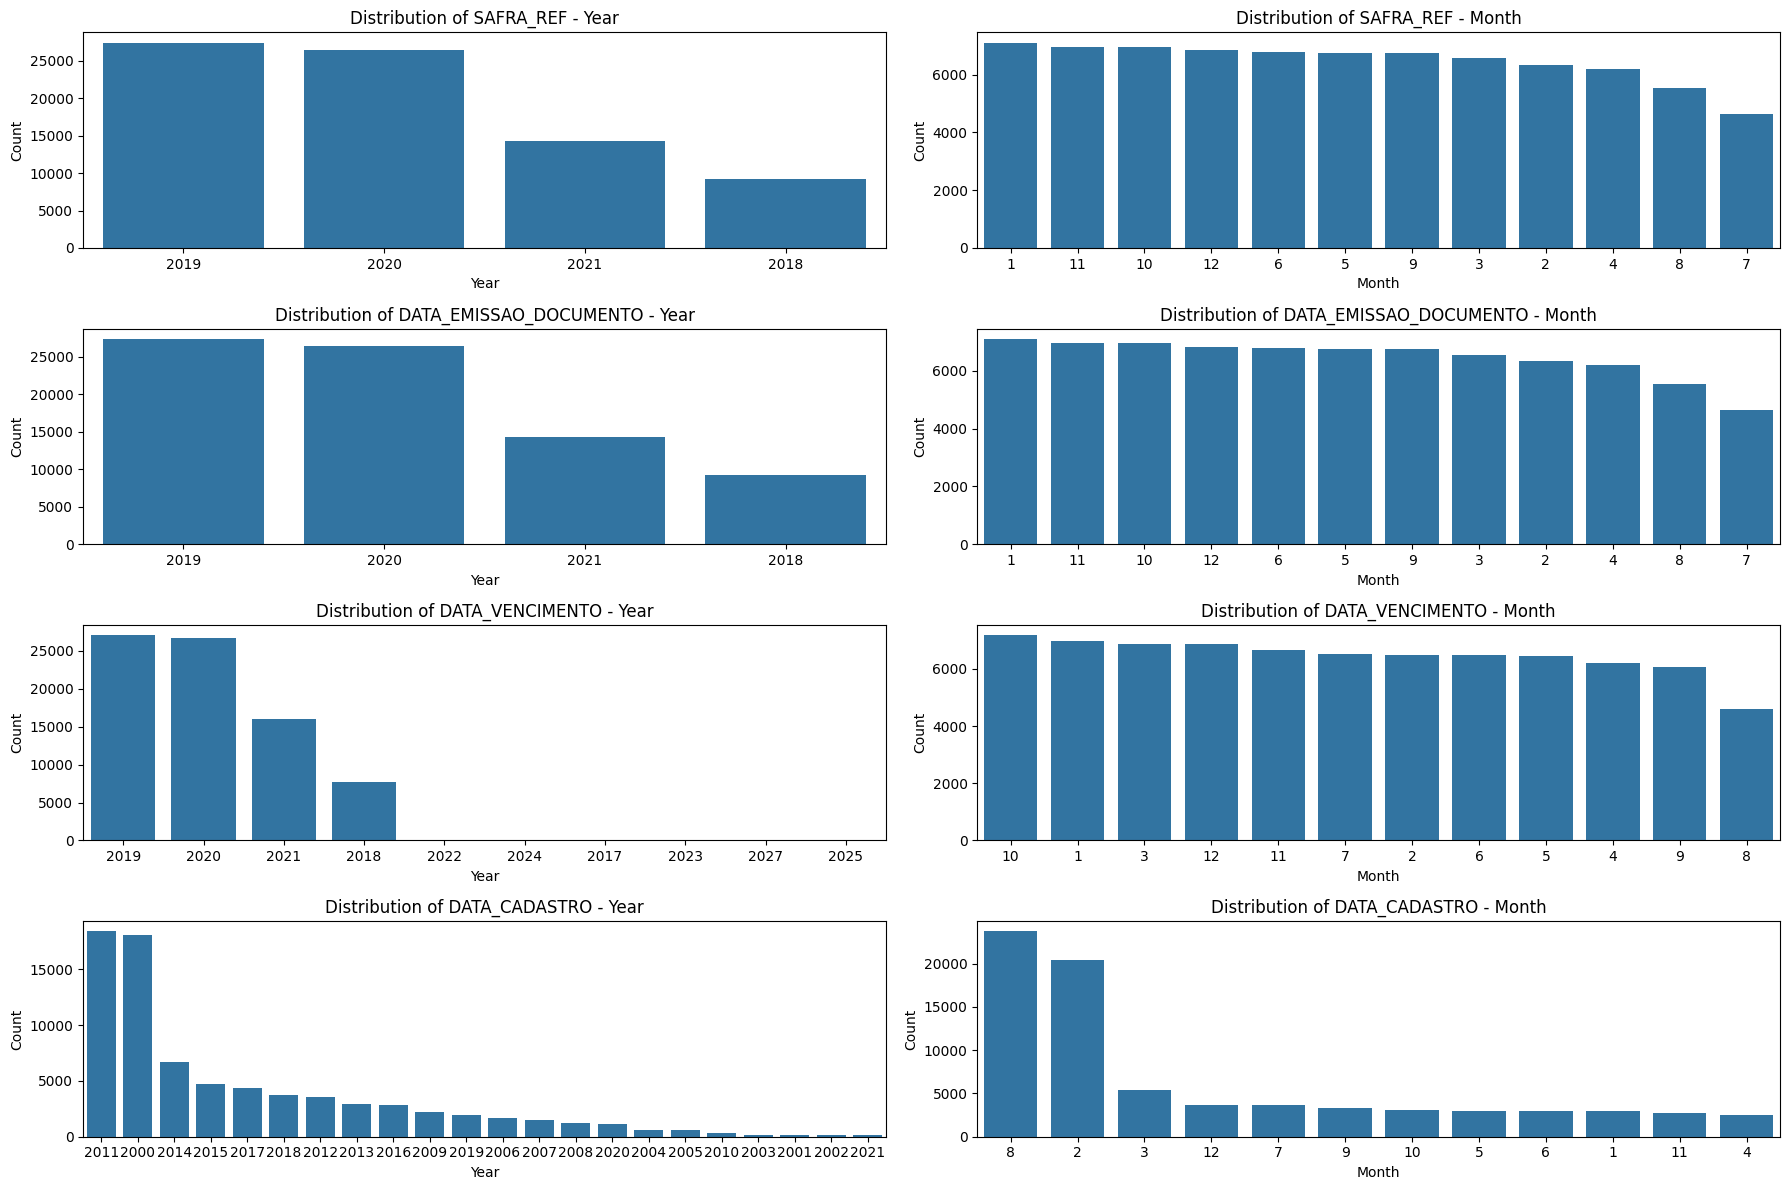

In [56]:
datetime_cols = df.select_dtypes(include="datetime").columns.to_list()
visualizer.datetime_univariate_analysis(datetime_cols, 4, 2)

### Observations:
- It's clear that the years **2019** and **2020** were the busiest ones, in terms of loans requests by customers
- All months show a very similar quantity of loans request, except **July** and **August** where it drops a little 
- `DATA_CADASTRO` shows that the years **2011** and **2000** were by far the years when clients registered. Also, it's possible to see that the months **August** and **February** are the most used months for clients to register, indicating that clients tends to register in the beginning of semesters

# Features x Target

## Numerical Features

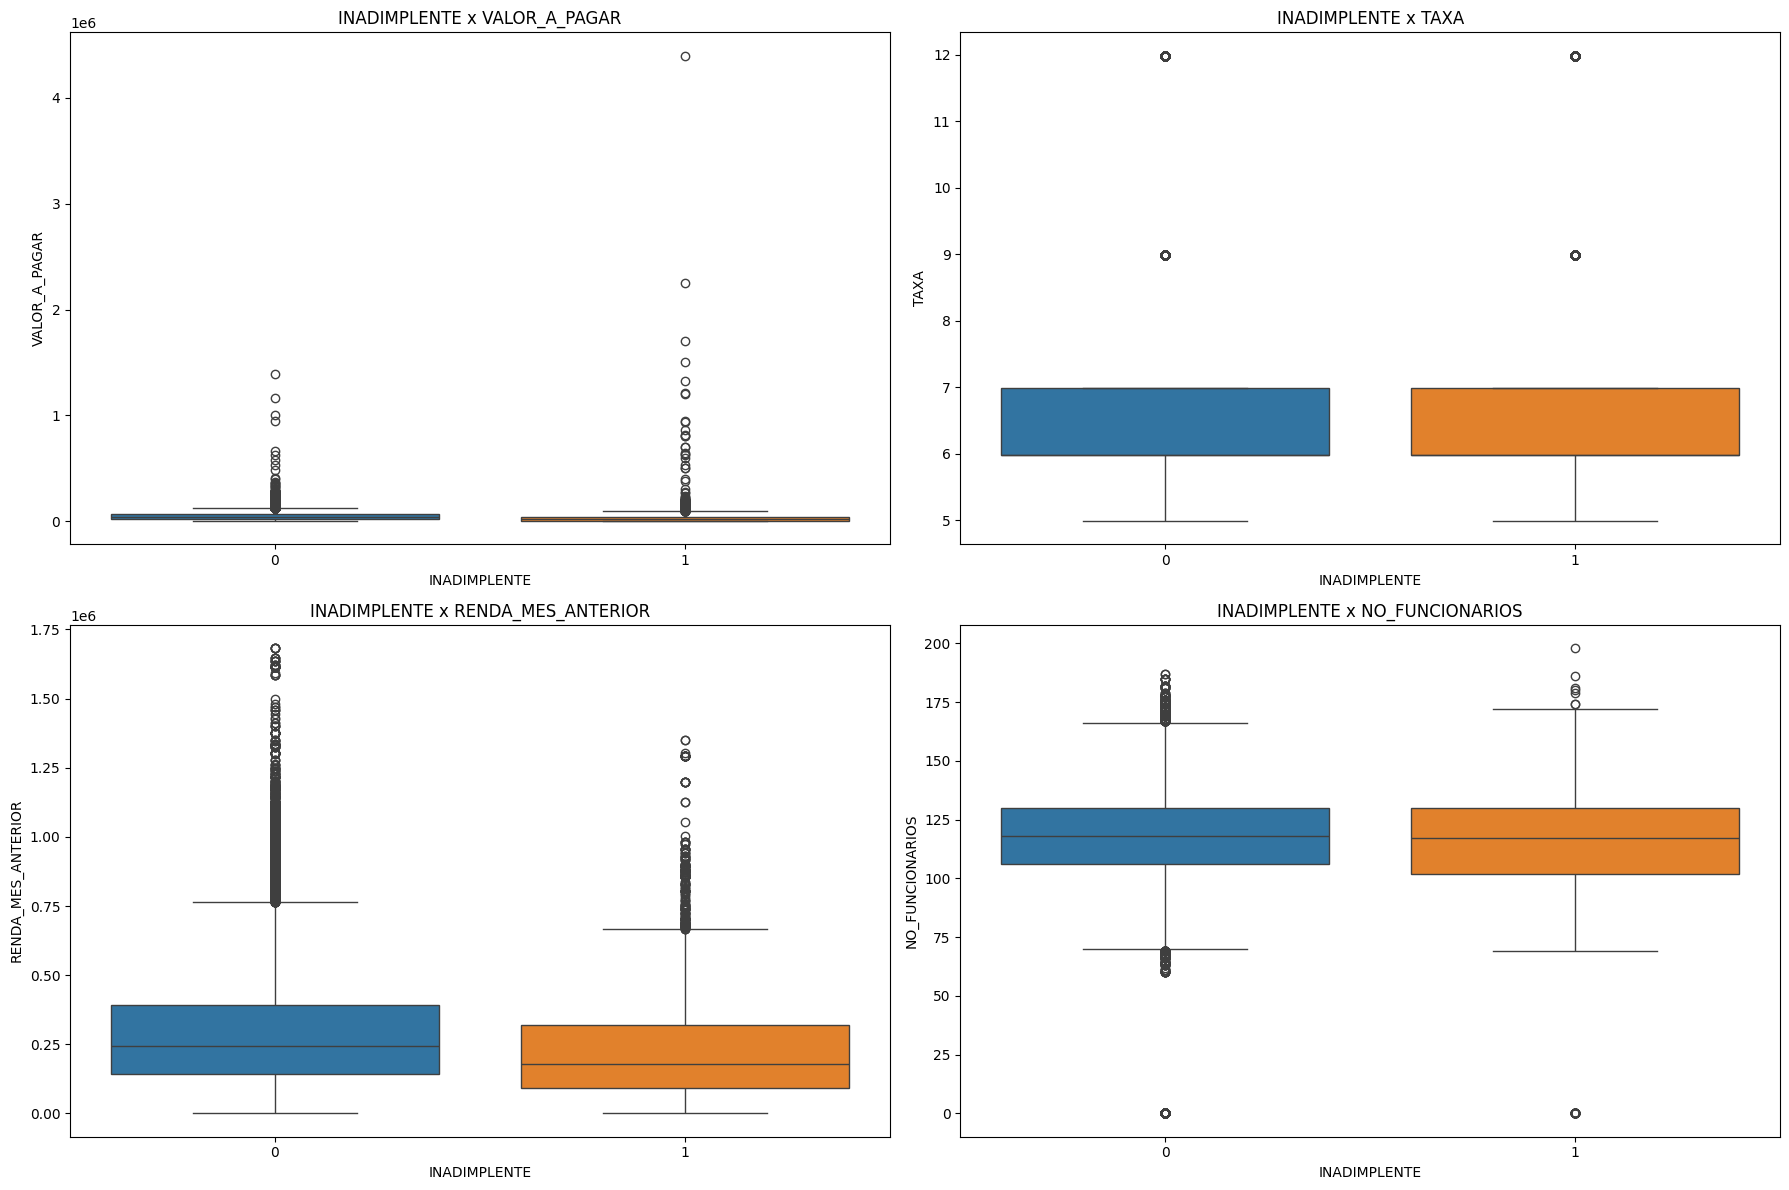

In [57]:
visualizer.num_features_vs_target(2, 2, "INADIMPLENTE", numerical_columns, "boxplot")

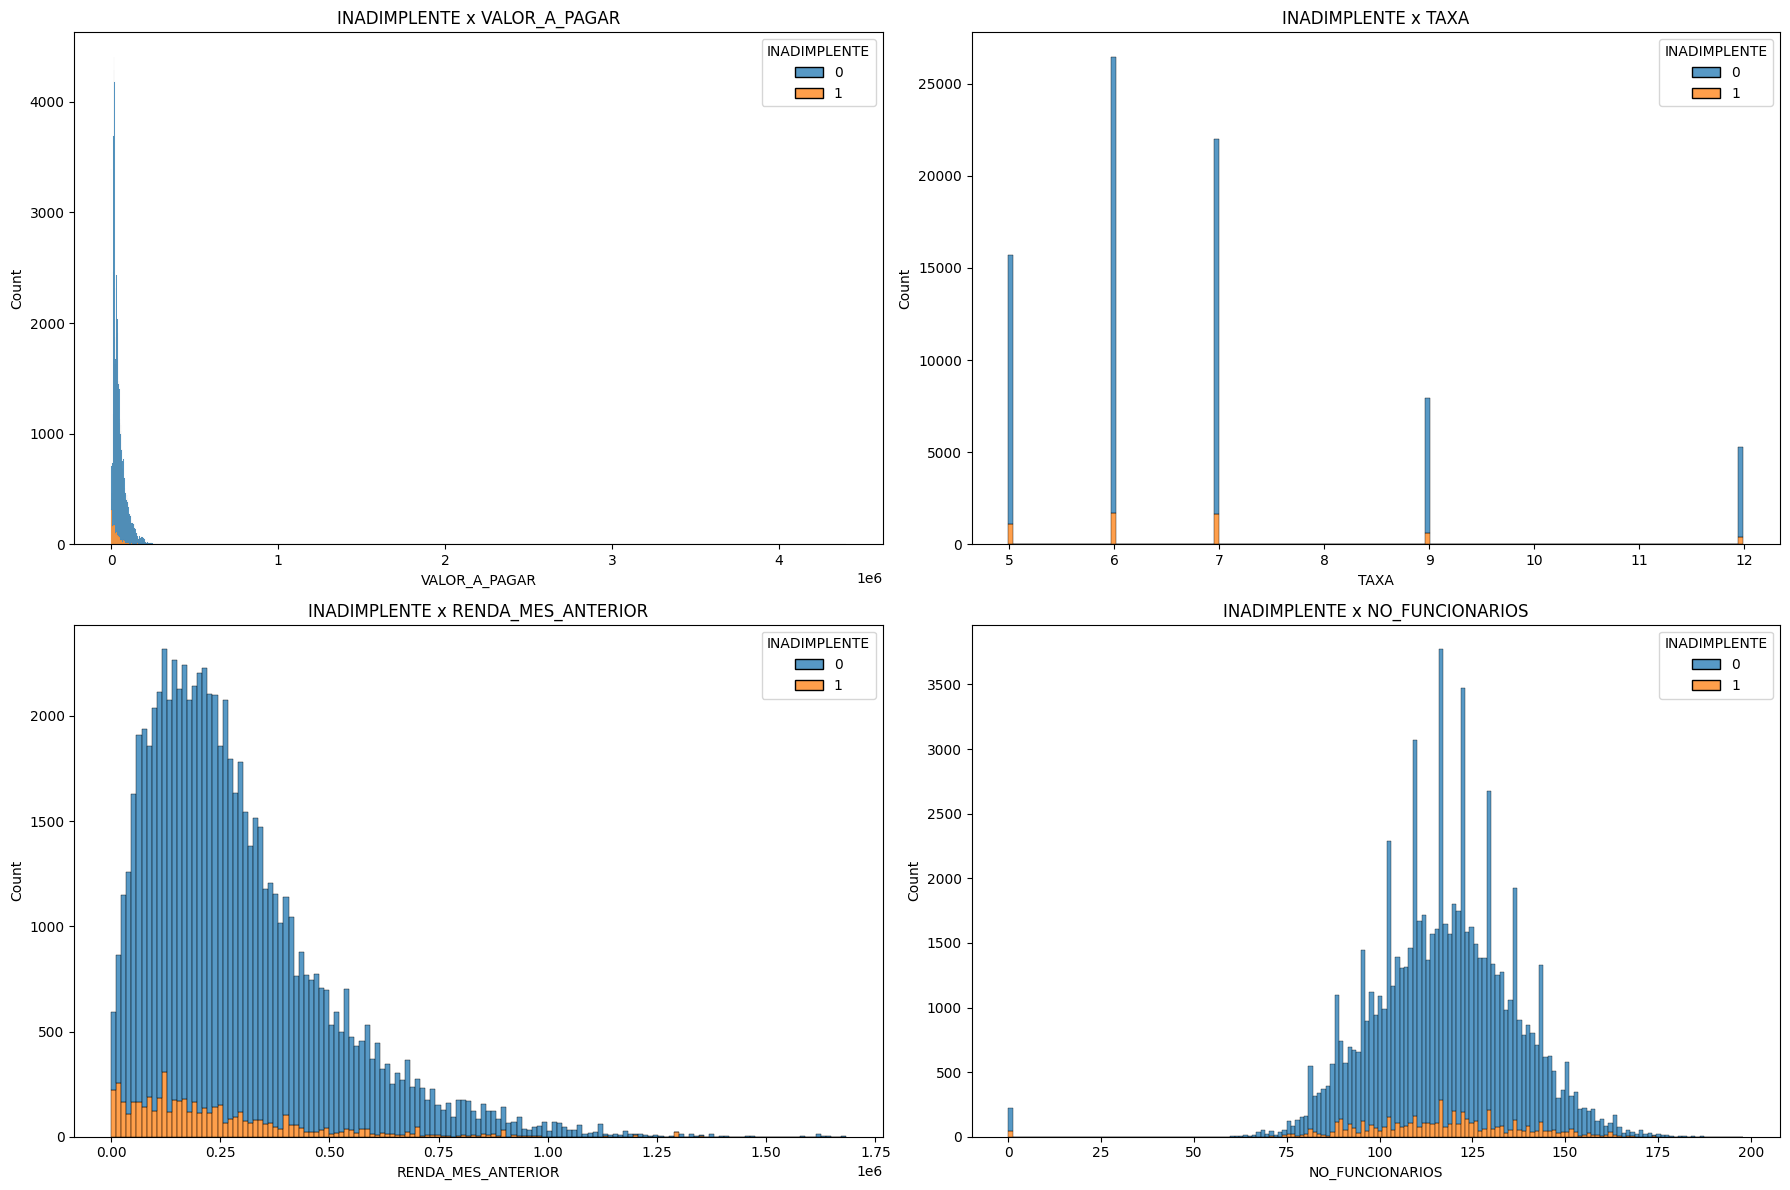

In [58]:
visualizer.num_features_vs_target(2, 2, "INADIMPLENTE", numerical_columns, "histplot")

In [75]:
df.groupby('TAXA')['INADIMPLENTE'].mean().reset_index()

,TAXA,INADIMPLENTE
0,4.99,0.069923
1,5.99,0.063683
2,6.99,0.074792
3,8.99,0.076254
4,11.99,0.075703


### Observations:
- Both graphs of `VALOR_A_PAGAR` are very hard to analize, due to the amount of outliers, but the boxplot shows that defaulting customers usually have a very high amount to pay, but this conclusion is only based on the outliers themselfs, so it's not firm ou reliable conclusion 
- Since `TAXA` only has five different values, we can see the mean of defaulting clients per fee value. **6.99**, **8.99** and **11.99** have almost the same amount of defaulting clients, with **4.99** being the second lowest and **5.99** the lowest overall
- `RENDA_MES_ANTERIOR` is very good column because both the boxplot and histogram shows that the lower the past months income is, the higher the chance of the client not paying his loans
- `NO_FUNCIONARIOS` shows no clear pattern with the target

## Categorical Features

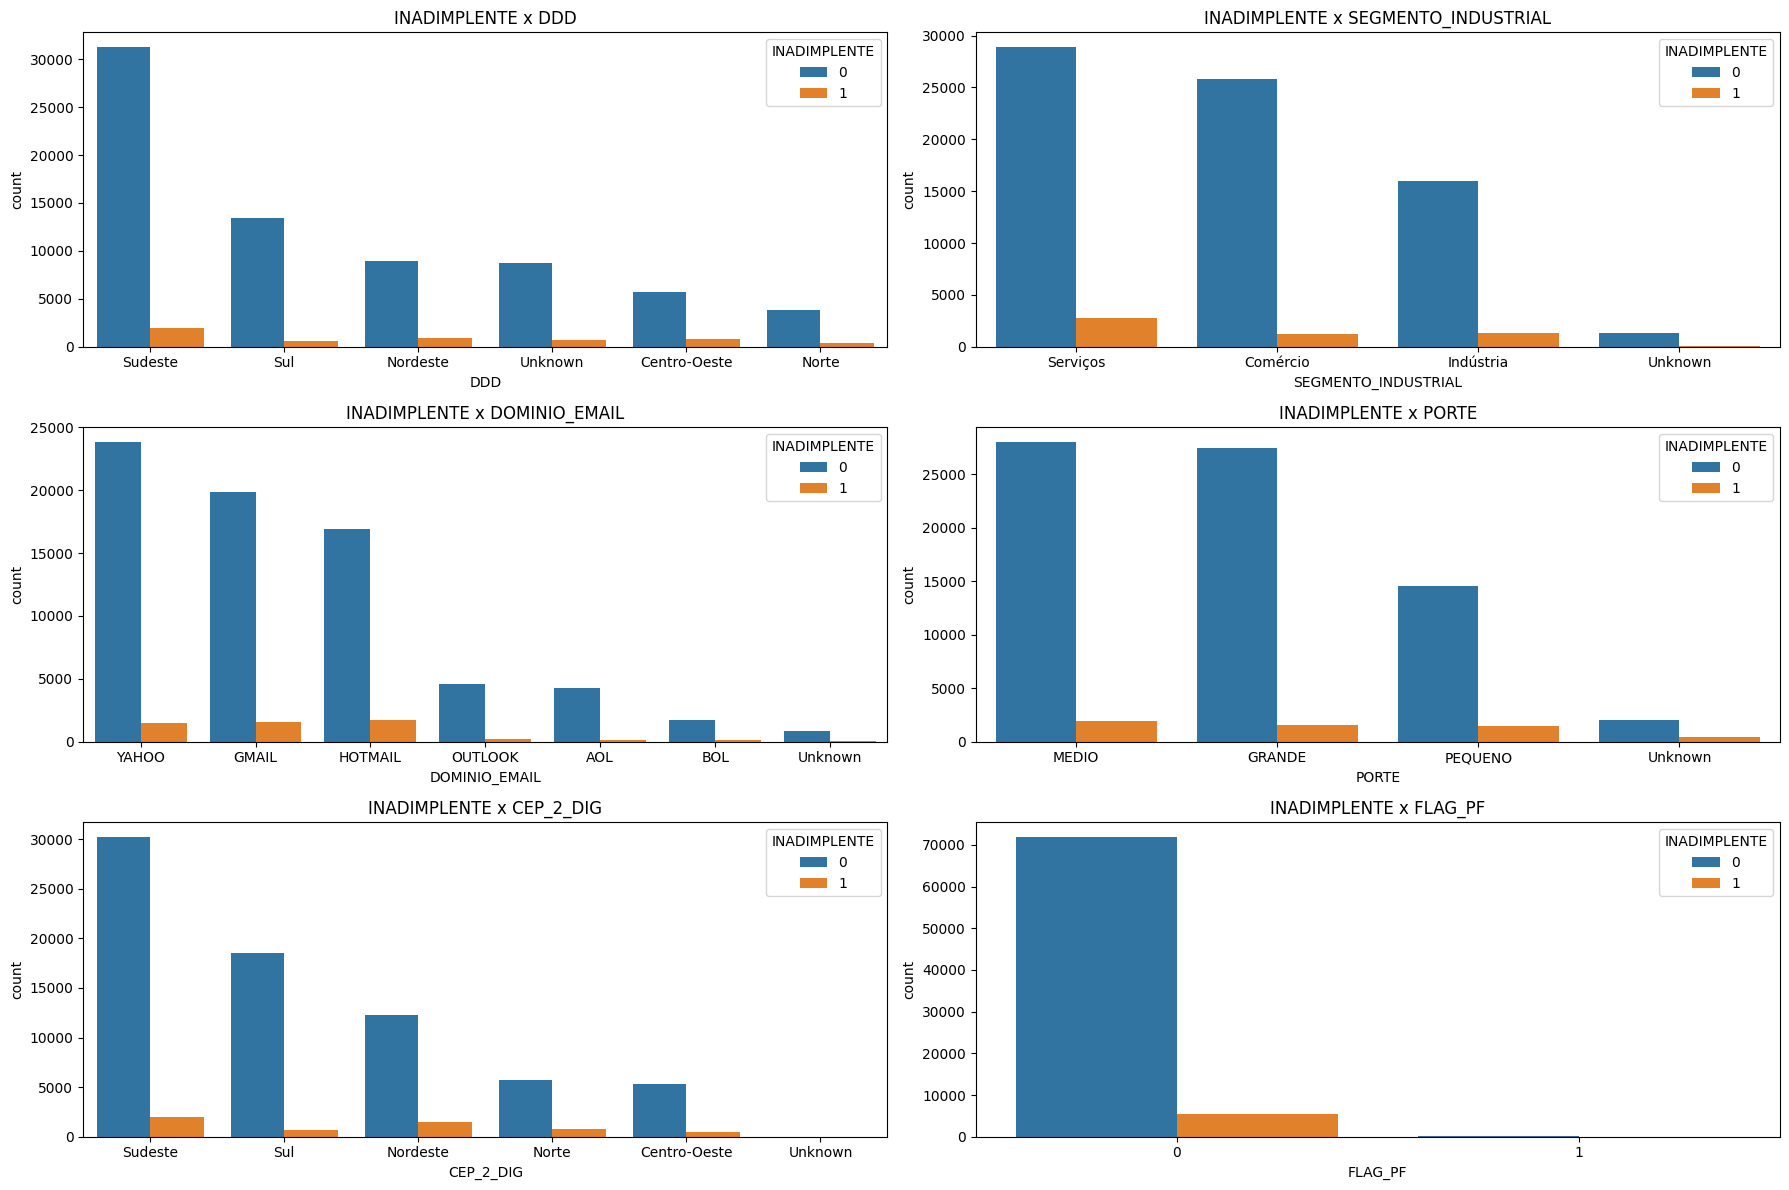

In [60]:
visualizer.cat_features_vs_target(3, 2, "INADIMPLENTE", cat_columns, "countplot")

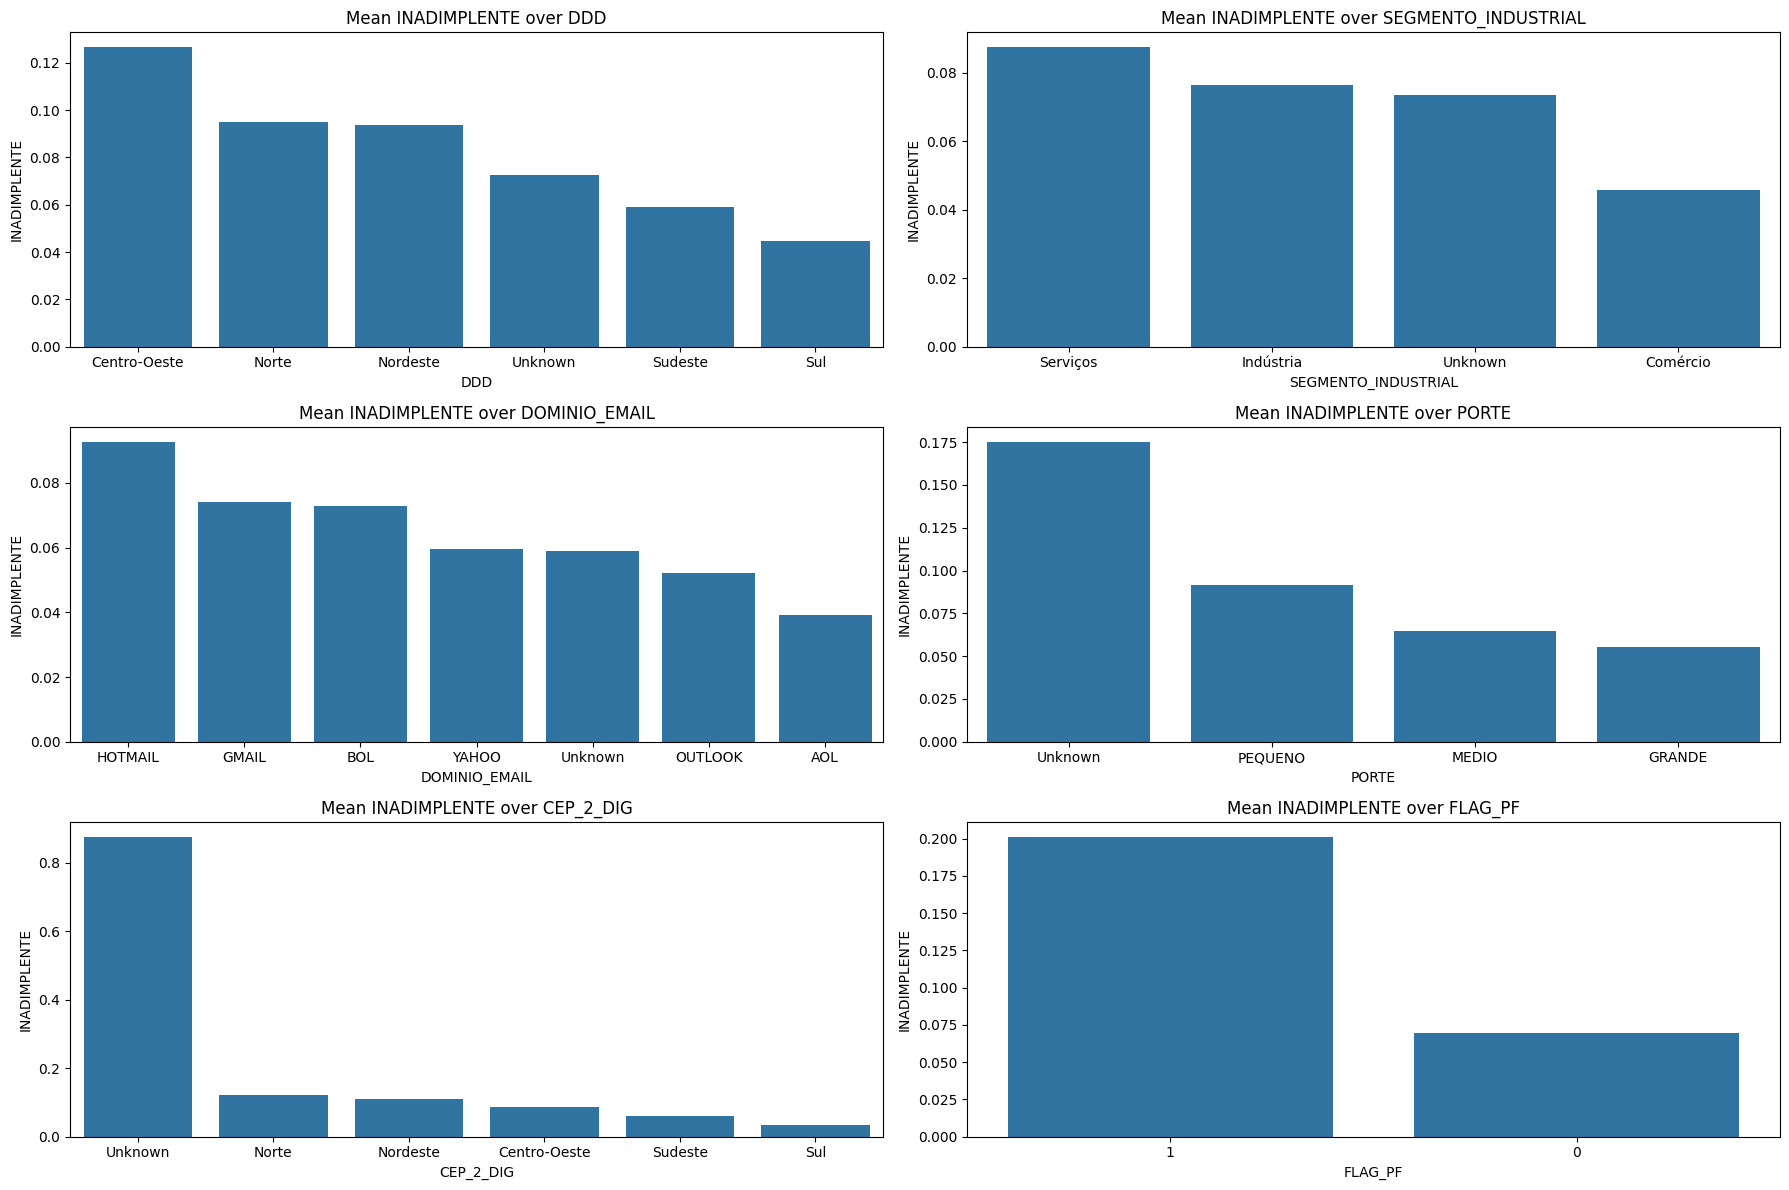

In [61]:
visualizer.cat_features_vs_target(3, 2, "INADIMPLENTE", cat_columns, "barplot")

### Observations:
- `DDD` shows a very interesting behavior against the target. In the region **Centro-Oeste** there's a mean of 12% of clients who are defaulters, and this region has the lowest amount of clients, when we exclude the unknown category. Also, the two regions with the most amount of clients, **Sudeste** and **Sul** are the regions with the lowest mean of defaulting clients
- In `SEGMENTO_INDUSTRIAL`, **Serviços** is the segment with the highest mean of defaulting clients. **Comércio**, which is the second segment with the most amount of clients, is the segment with the lowest mean of defaulting clients
- `DOMONIO_EMAIL` shows that **Hotmail**, the third most used email domain, has a mean of almost 10% of defaulters. All other domains have similar mean of defaulters, with only **AOL** being way below the others
- `PORTE` and `CEP_2_DIG` shows a very interesting behavior. On both columns, the mean of defaulting clients is way higher for the **Unknown** category
- Despite `FLAG_PF` showing a mean of 20% of clients that are flagged as **PF** are defaulters, the column has more than 99% of its values concentrated on the value **0**. The lack of variance in this column is a big problem

## Datetime Features

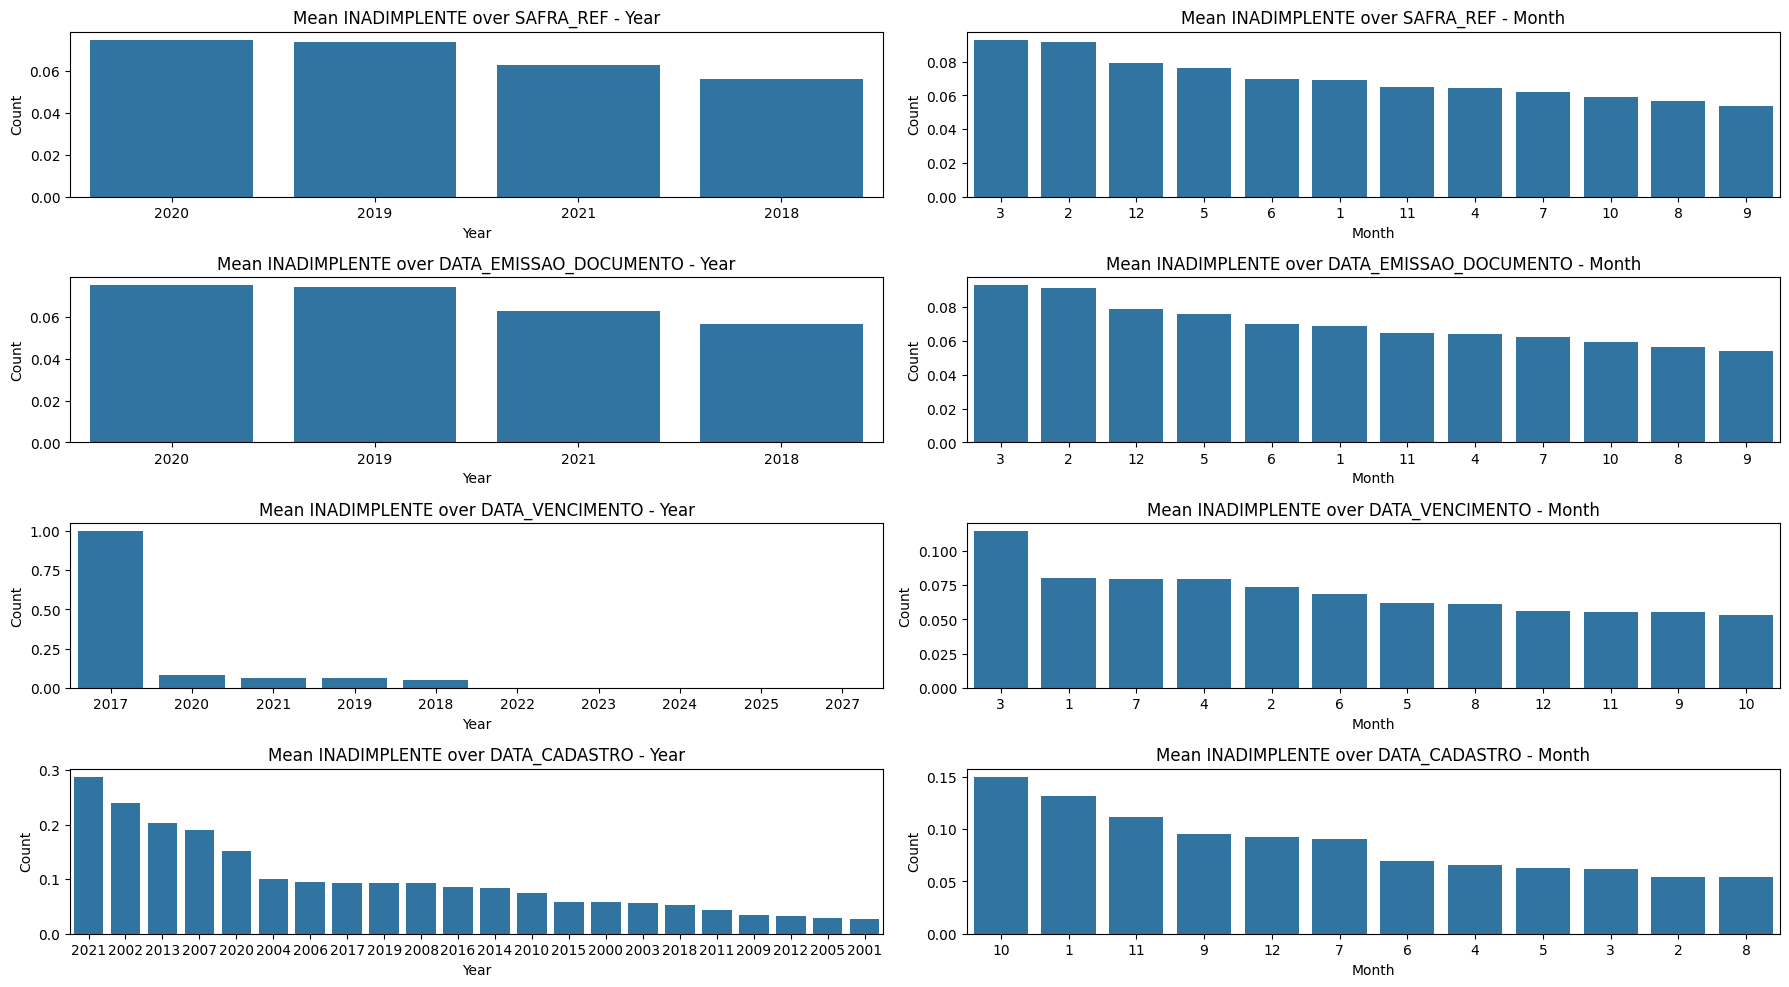

In [62]:
visualizer.datetime_features_vs_target(datetime_cols, 5, 2, "INADIMPLENTE")

In [64]:
df.groupby(df["DATA_VENCIMENTO"].dt.year).size()

DATA_VENCIMENTO
2017        2
2018     7658
2019    27087
2020    26678
2021    15971
2022        8
2023        2
2024        6
2025        1
2027        1
dtype: int64

### Observations:
- For `SAFRA_REF` and `DATA_EMISSAO_DOCUMENTO`, **Year** and **Month** have basically the same pattern, with the busiest years being the ones with the highest mean of defaulting clients, and **February** and **March** being the months with the highest mean of defaulting clients. After these values, there's a steady decline for each other value
- `DATA_VENCIMENTO` shows that all loans with a due day for payment during **2017**, were not paid in time, but there were only two loans during that year. Also, if the month of the due day for payment is **March**, the mean for the client defaulting is more than 10%
- `DATA_CADASTRO` shows **August** with a mean of defaulting of almost 15%, and **2021** has a mean of almost 30%
### Impact:
- Since `SAFRA_REF` and `DATA_EMISSAO_DOCUMENTO` shows the exact same numbers in relation to the target and during the univariate analysis, it's safe to drop both of them and extract the year and month of one of them and check if they are relevant
- `DATA_VENCIMENTO` have all years with actual big transaction numbers behaving the same against the target, but a clear difference in months. For this reason, it could be useful to extract the months of this feature and check if it's relevant
- For `DATA_CADASTRO`, it's interesting to get the year and months of this column and check if they are relevant

# Multivariable Analysis

## DDD x Numericals

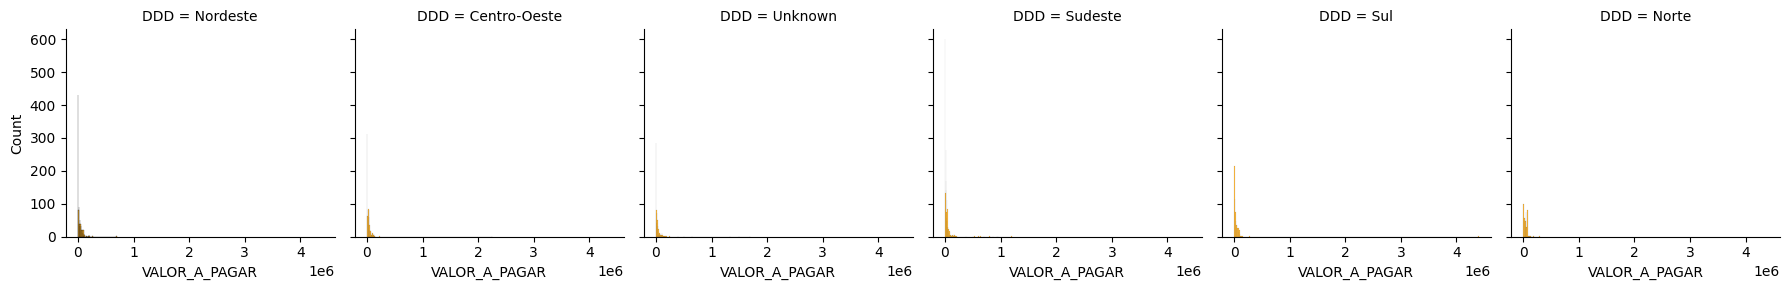

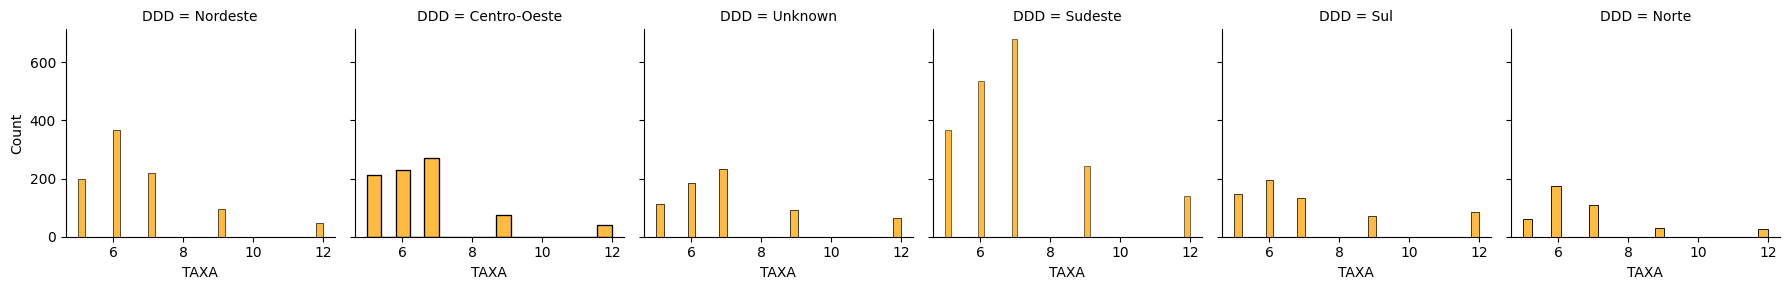

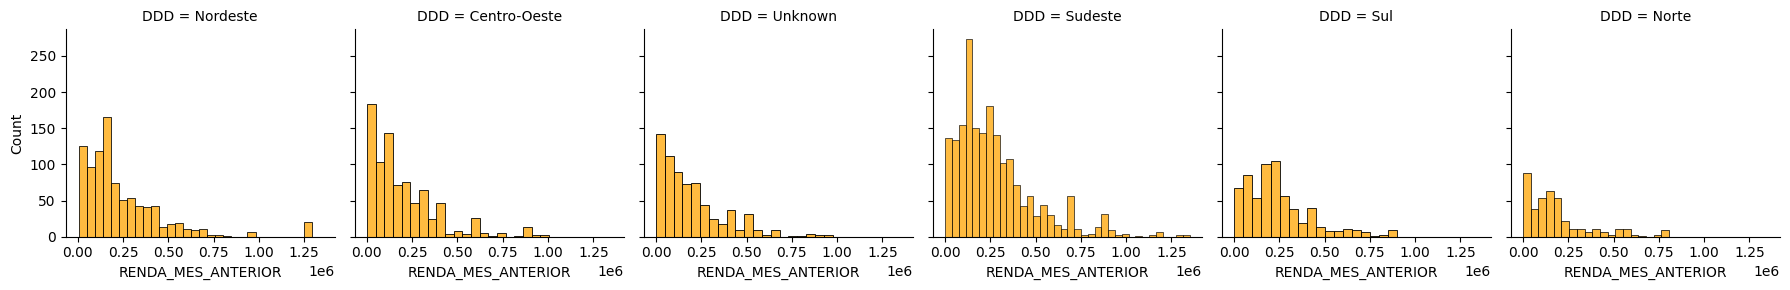

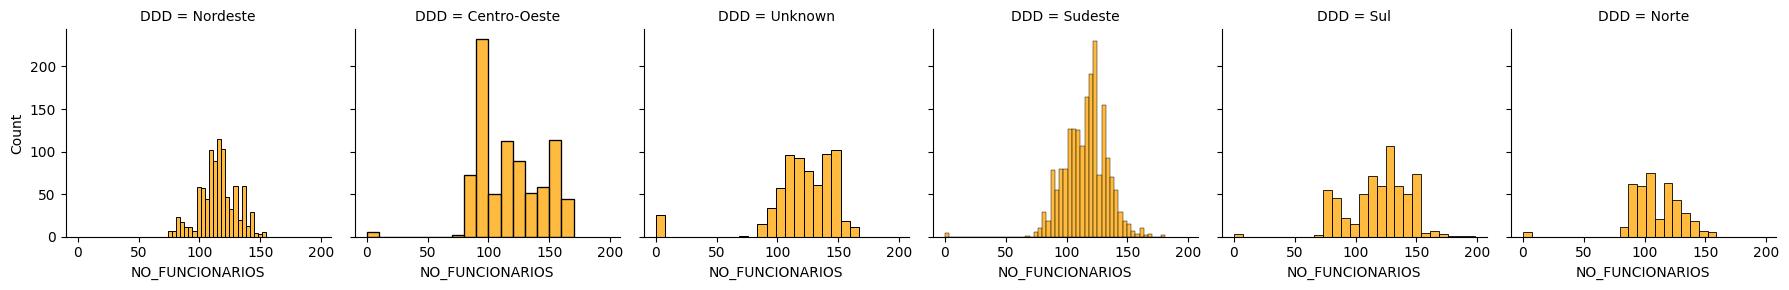

In [18]:
visualizer.facegrid_hist_target(facecol="DDD", color="orange", cols=numerical_columns, target="INADIMPLENTE")

## SEGMENTO_INDUSTRIAL x Numericals

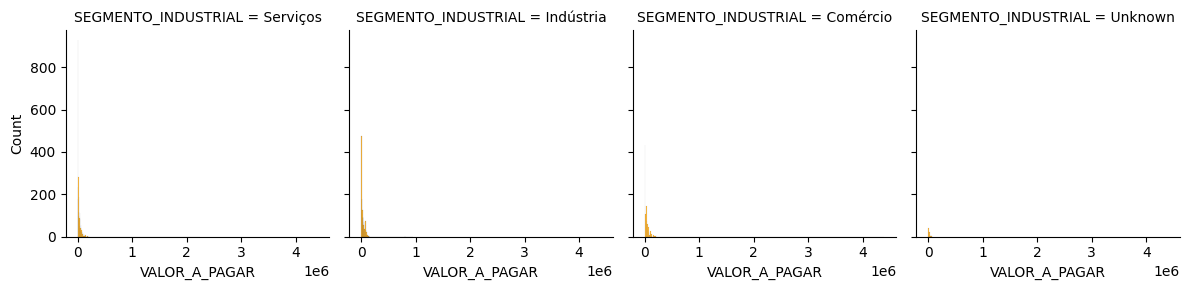

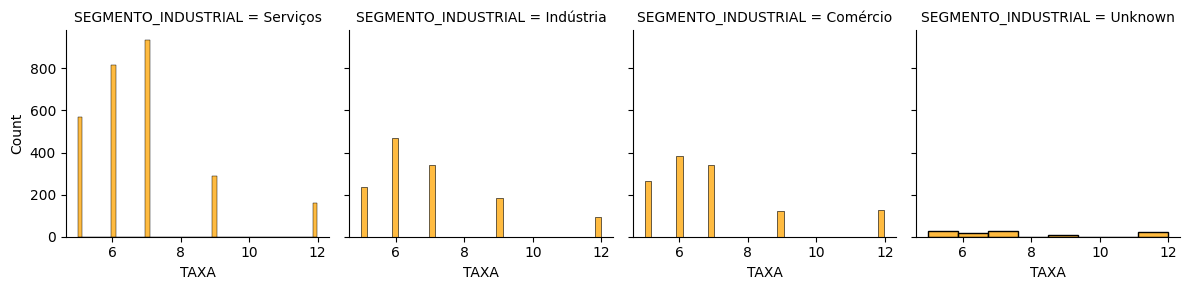

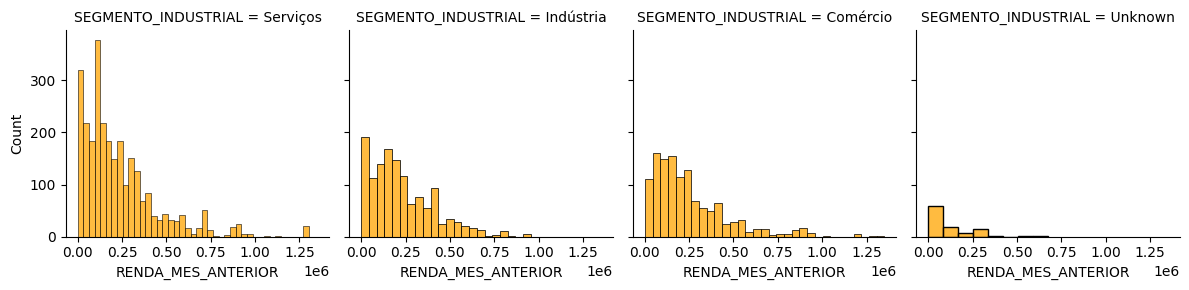

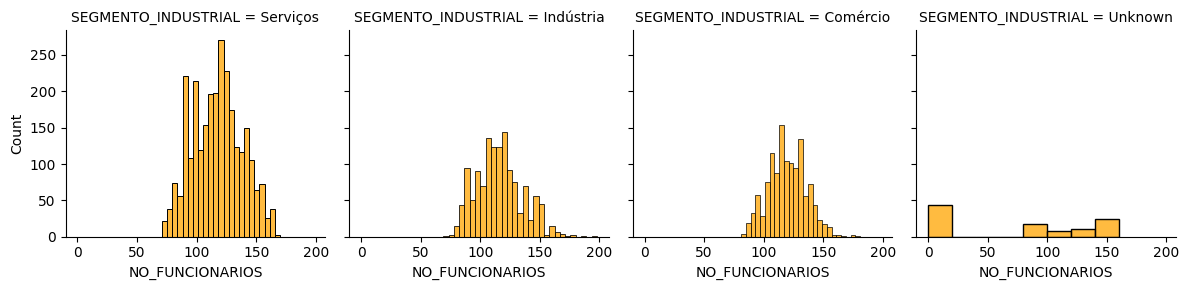

In [66]:
visualizer.facegrid_hist_target(facecol="SEGMENTO_INDUSTRIAL", color="orange", cols=numerical_columns, target="INADIMPLENTE")

## DOMINIO_EMAIL x Numericals

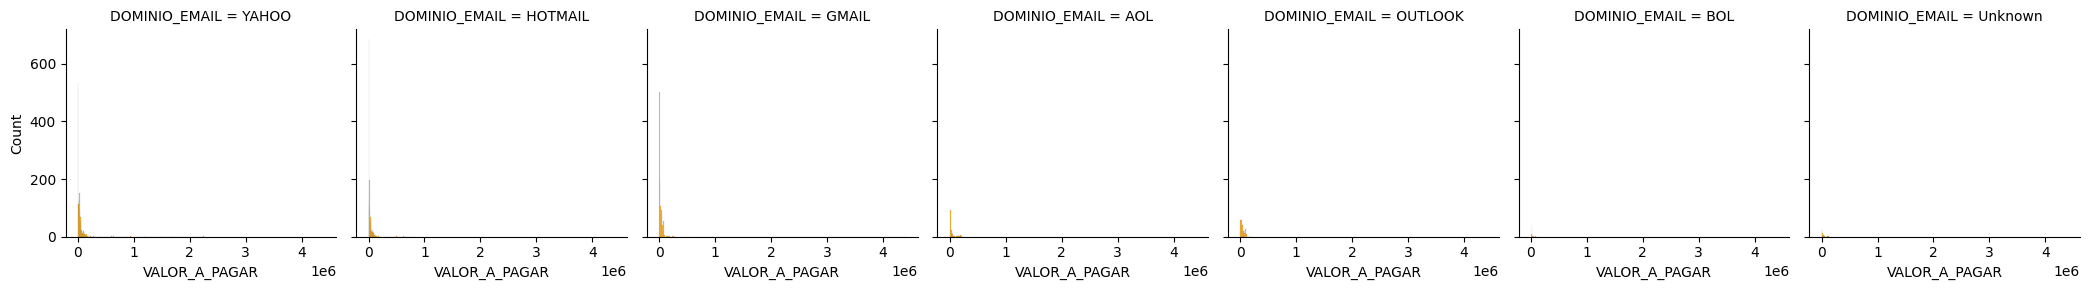

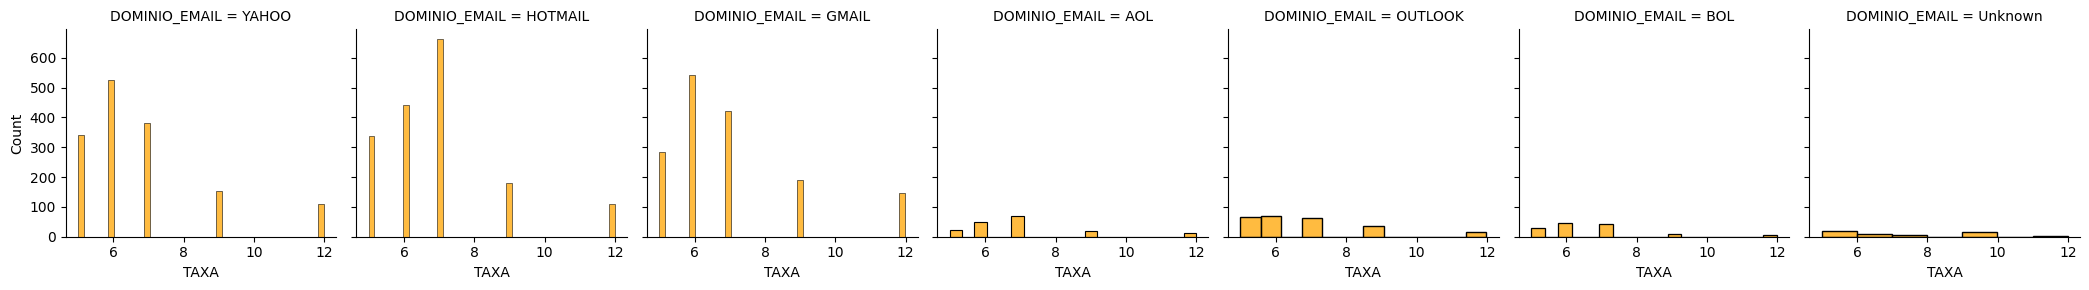

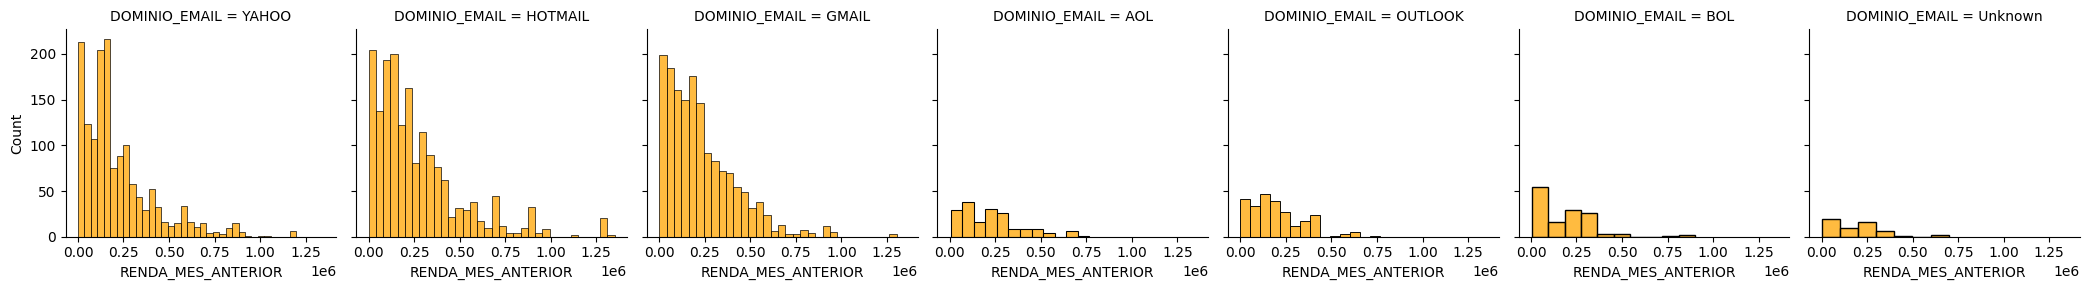

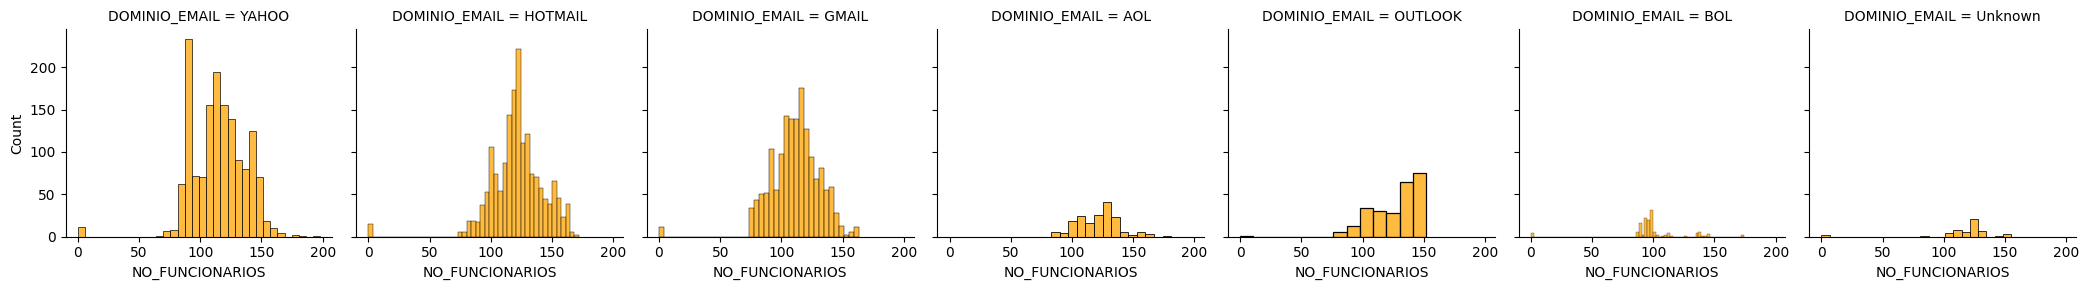

In [67]:
visualizer.facegrid_hist_target(facecol="DOMINIO_EMAIL", color="orange", cols=numerical_columns, target="INADIMPLENTE")

## PORTE x Numericals

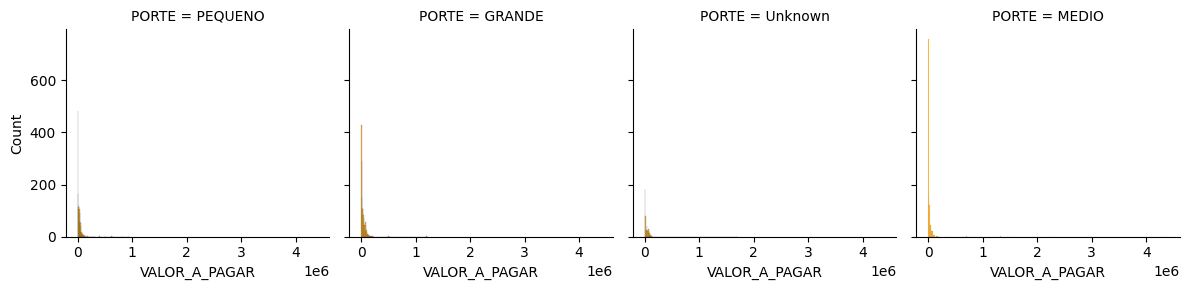

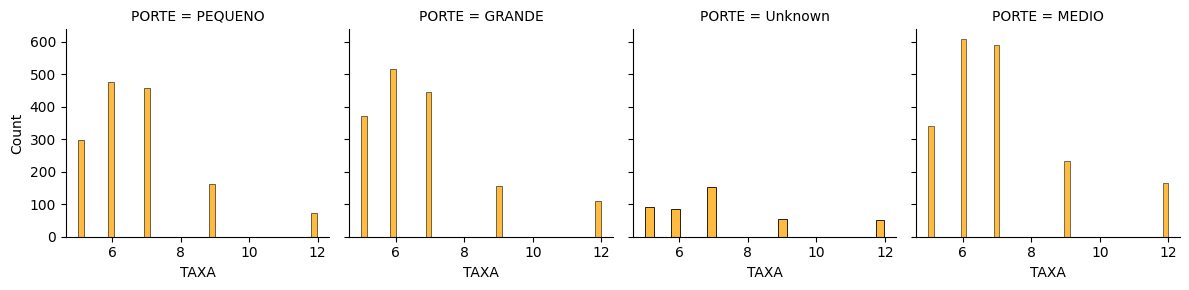

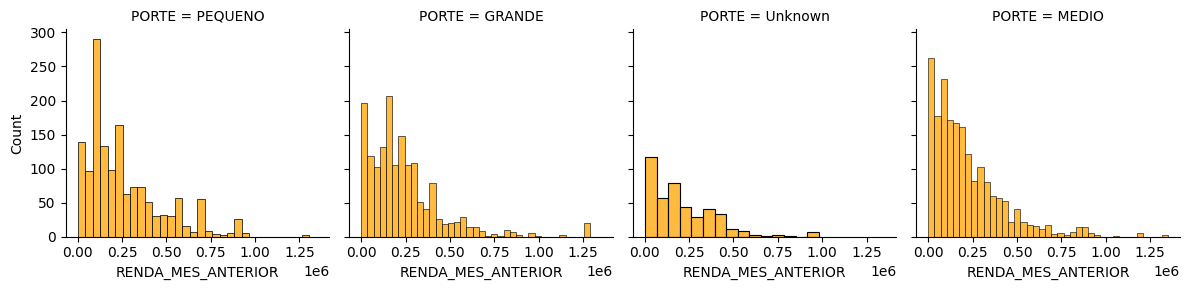

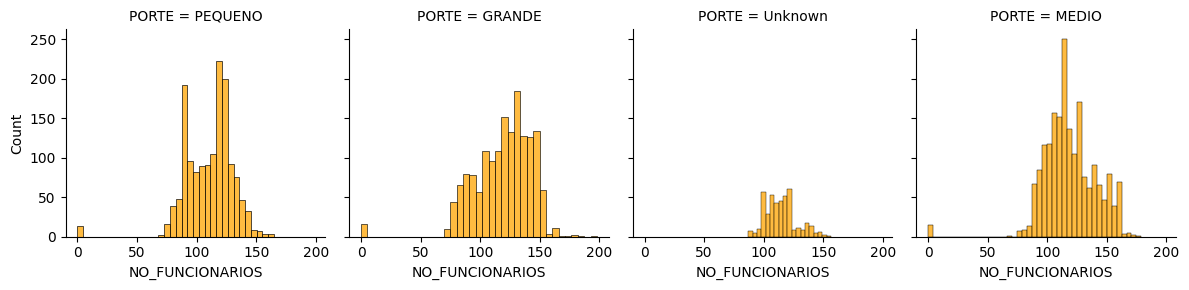

In [76]:
visualizer.facegrid_hist_target(facecol="PORTE", color="orange", cols=numerical_columns, target="INADIMPLENTE")

## CEP_2_DIG x Numericals

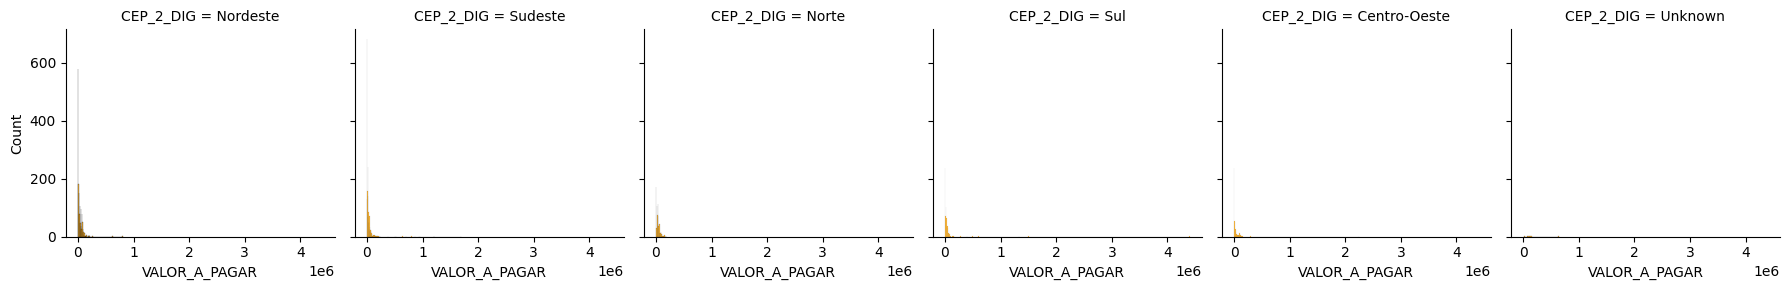

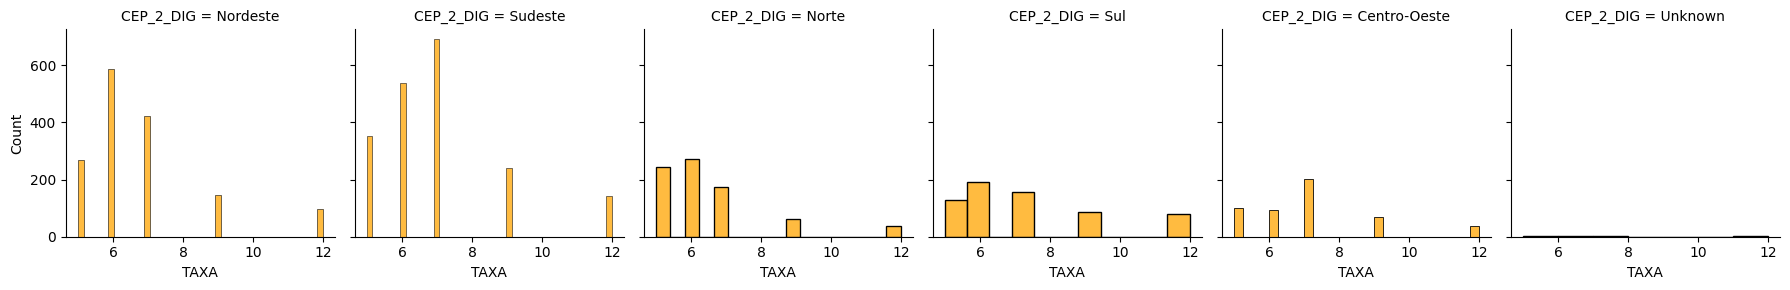

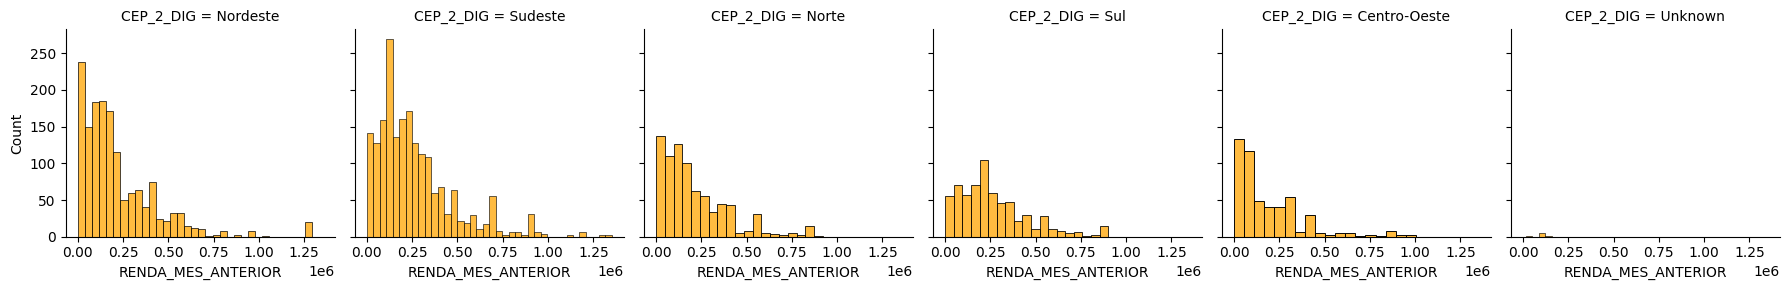

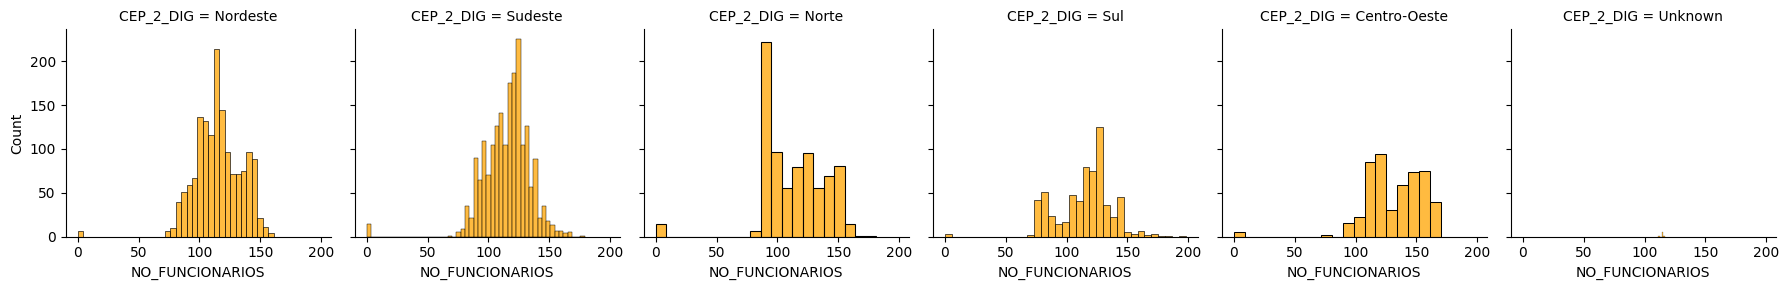

In [77]:
visualizer.facegrid_hist_target(facecol="CEP_2_DIG", color="orange", cols=numerical_columns, target="INADIMPLENTE")

### Observations:
- For `DDD`, all numeric columns show the same patterns for every region in relation to the target. The only thing that is a bit different is the region **Centro-Oeste** that has a spike of defaulters when `NO_FUNCIONARIOS` is around 90-100, while in every other region, is always between 100-150
- `SEGMENTO_INDUSTRIAL` follows the same blueprint as `DDD`, with all numeric variables behaving the same way as previously seen. The only different point here, is that for the **Unknown** segment, when `NO_FUNCIONARIOS` is very low, there's a spike on defaulters
- `CEP_2_DIG` also has a peculiar interaction with `NO_FUNCIONARIOS`. In the region **Norte** there's a big spike of defaulters when the number of workers is around 90-100
- All other columns did not show any kind of special or strange behavior regarding the numerical features and how they behave themselves regarding the target

## Numericals x Numericals

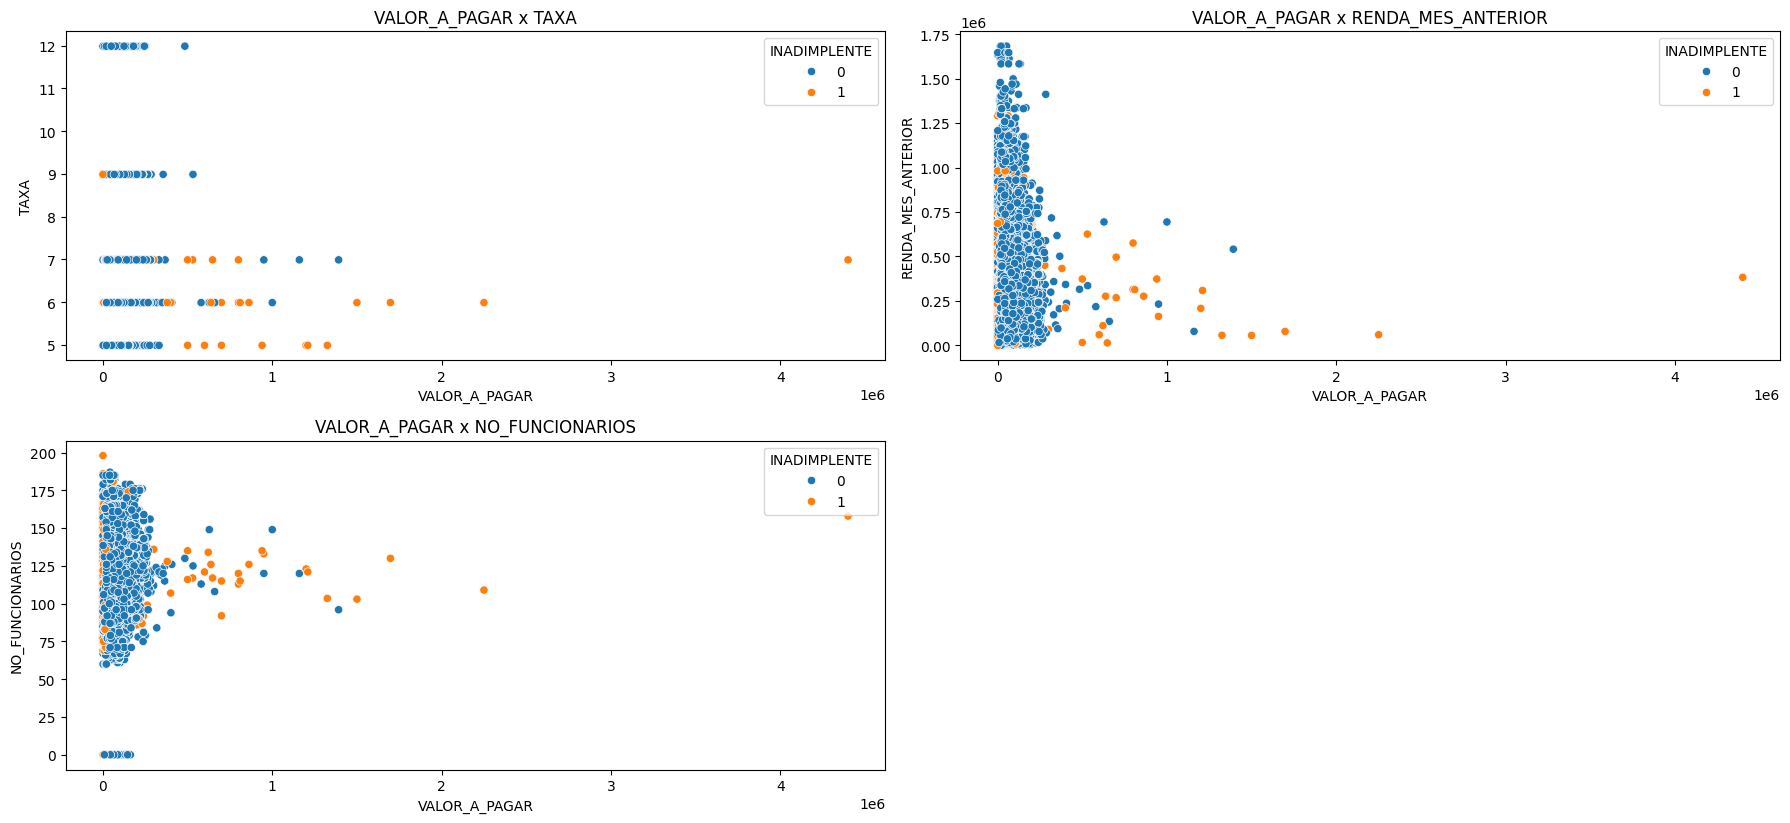

In [78]:
visualizer.scatter_numericals_target(3, 2, numerical_columns, "INADIMPLENTE", "VALOR_A_PAGAR")

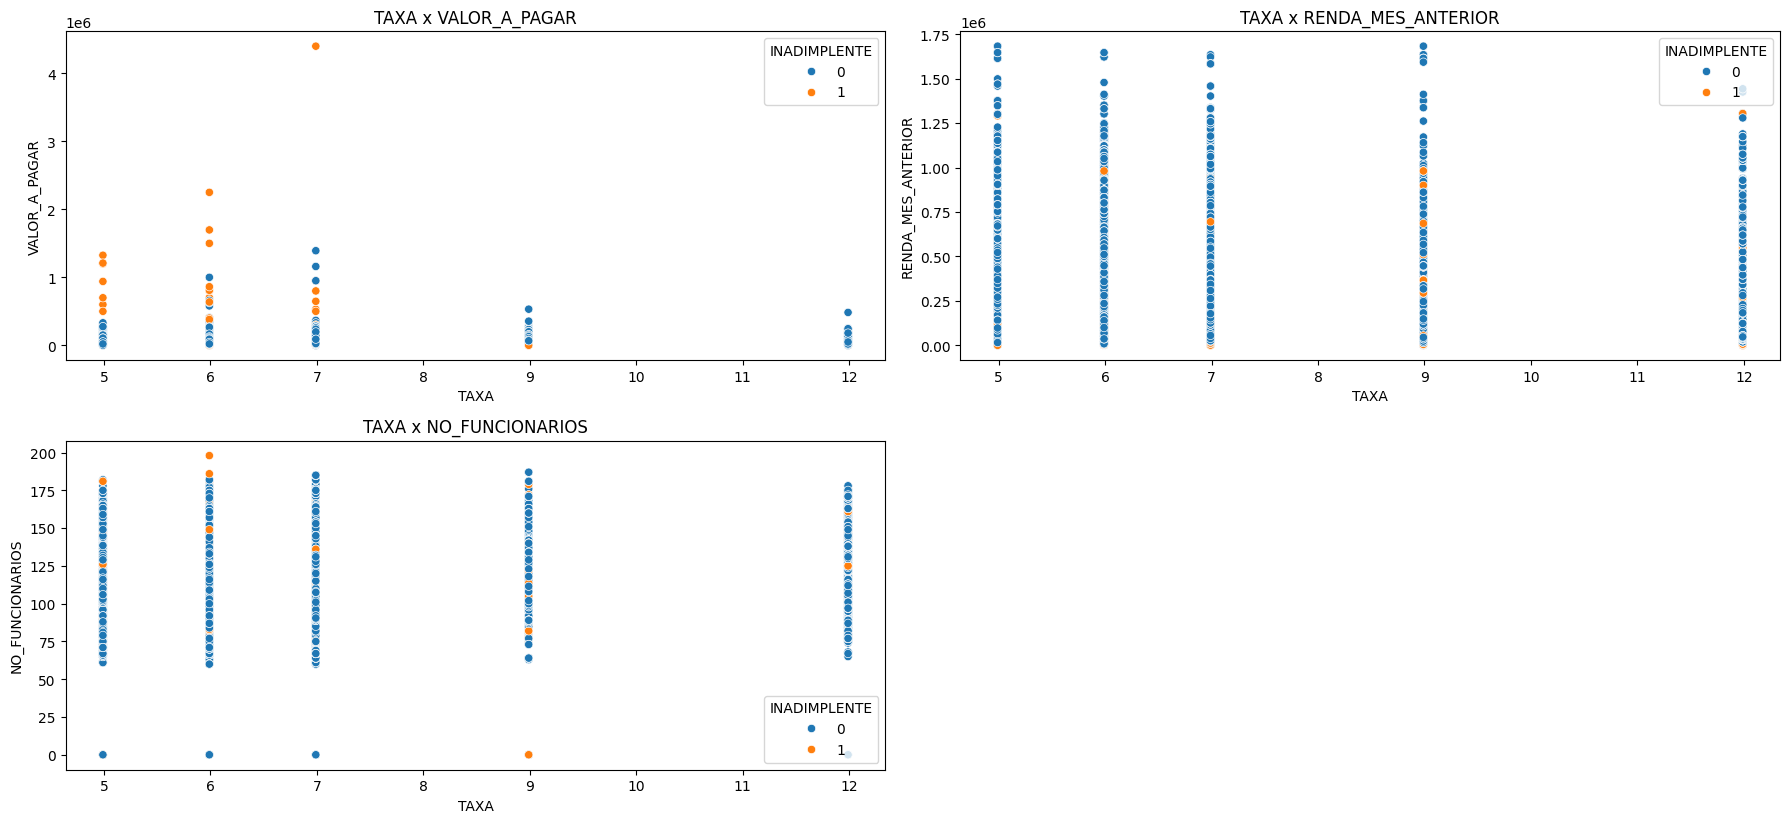

In [80]:
visualizer.scatter_numericals_target(3, 2, numerical_columns, "INADIMPLENTE", "TAXA")

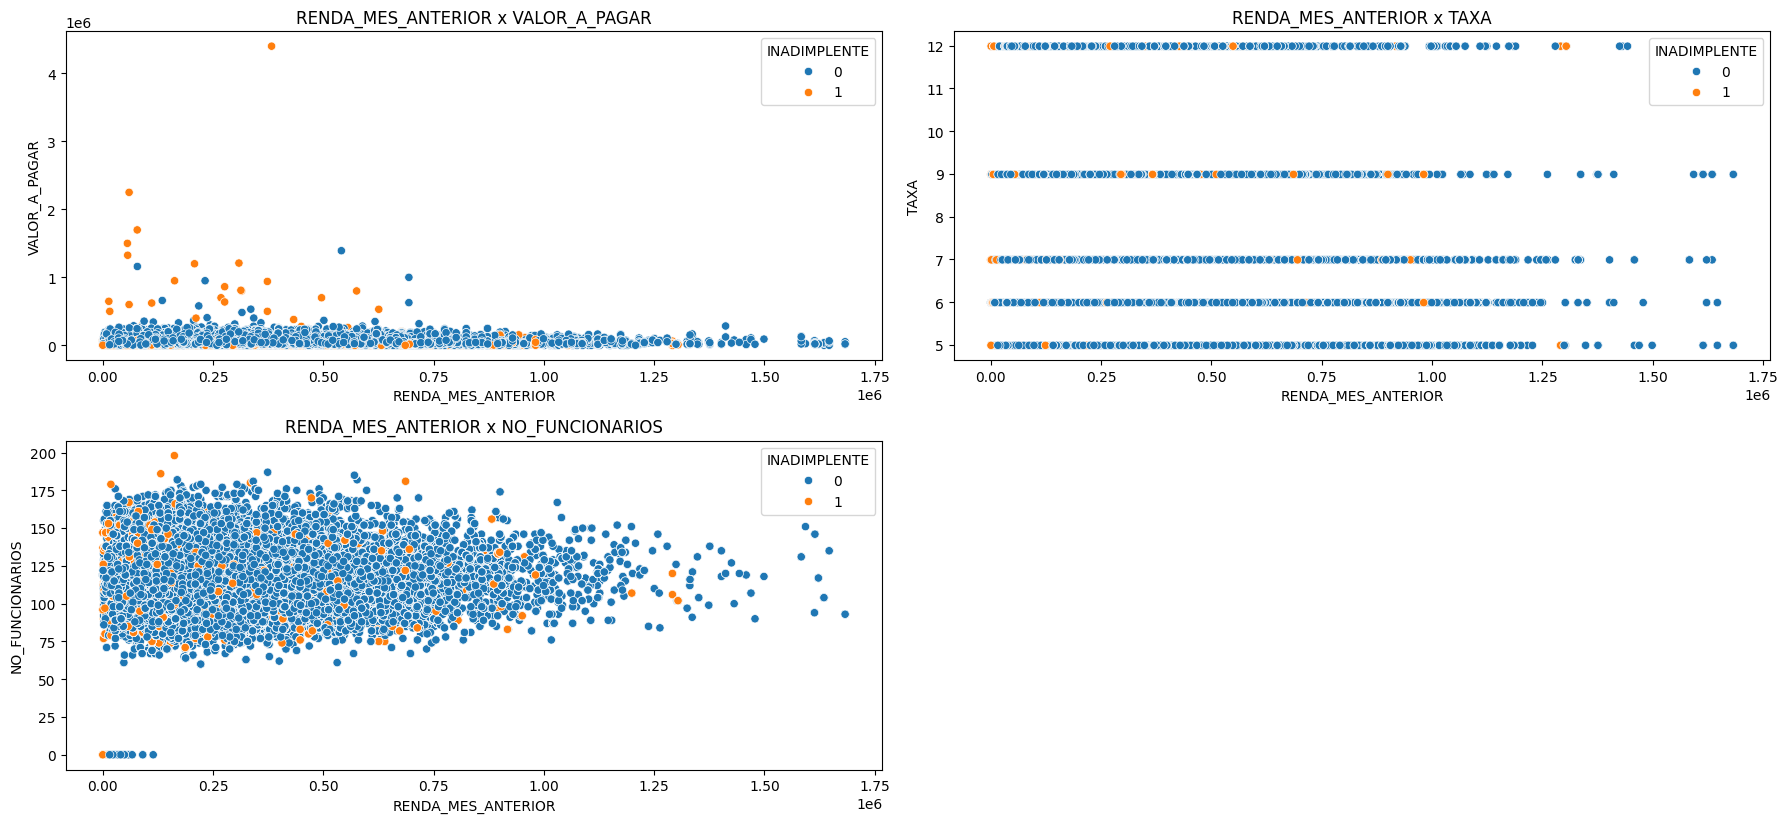

In [82]:
visualizer.scatter_numericals_target(3, 2, numerical_columns, "INADIMPLENTE", "RENDA_MES_ANTERIOR")

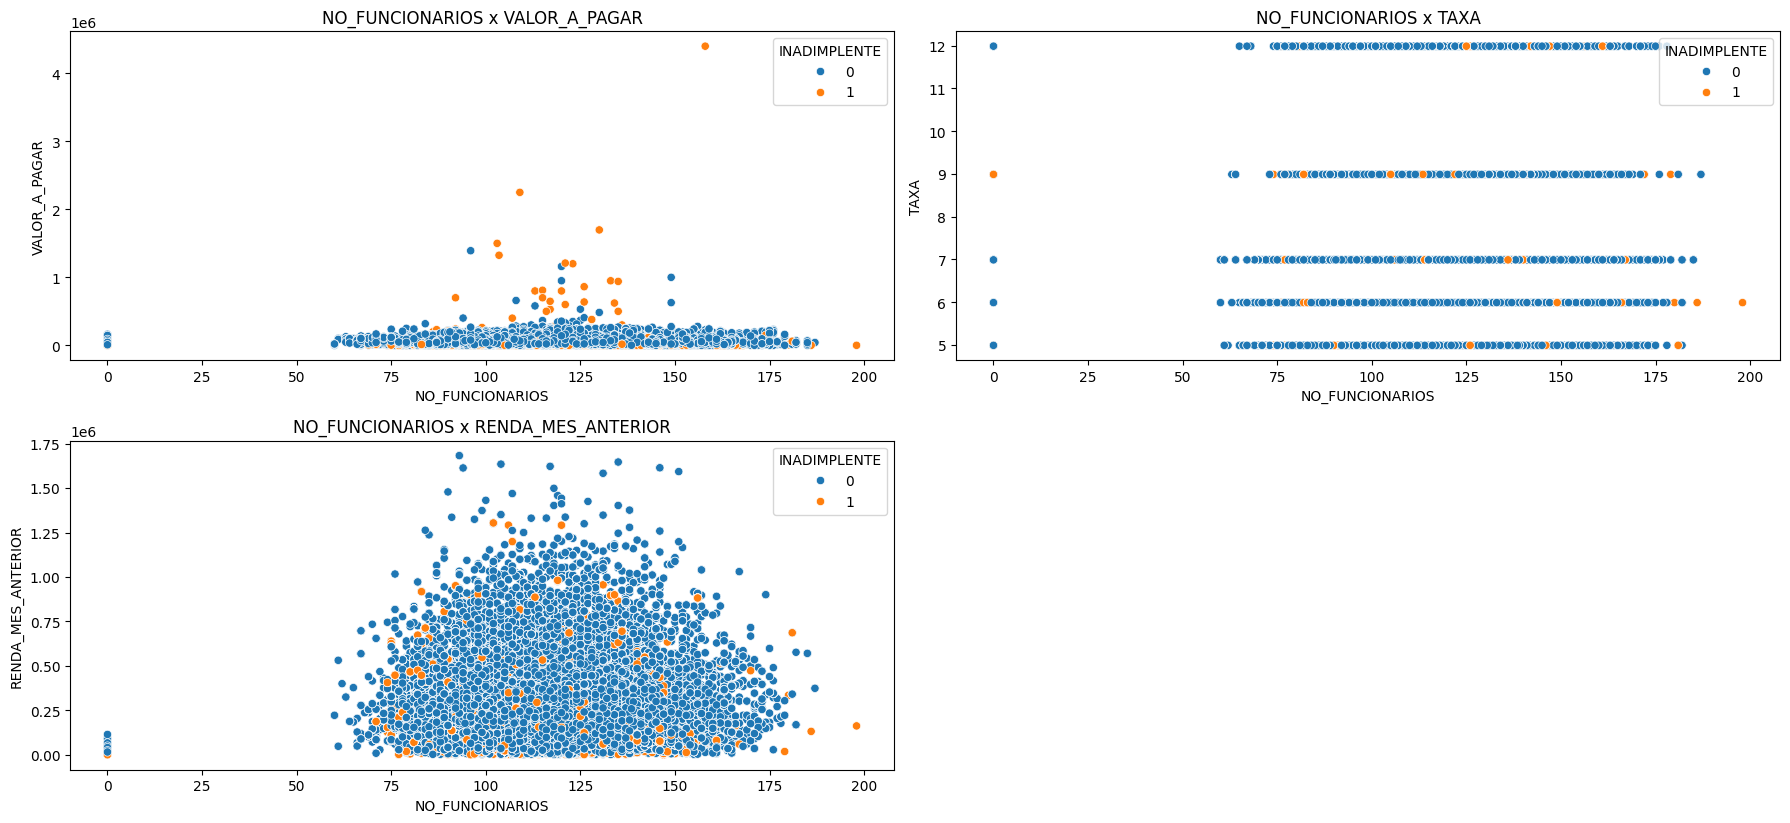

In [83]:
visualizer.scatter_numericals_target(3, 2, numerical_columns, "INADIMPLENTE", "NO_FUNCIONARIOS")

### Observations:
- The behavior of `VALOR_A_PAGAR` is clear when plotted against all other numerical features. The highest the amount to pay, the highest the number of defaulters
- Since some features stretch to the millions, it's very hard to see any kind of correlation between the numeric features

# Summary

### Main Insights:
- `INADIMPLENTE` is extremely unbalanced, with almost 93% of all data on the **No** class, determined by the 0
- `VALOR_A_PAGAR` has a heavily positively skewed distribution, with mode < median < mean
- All columns besides `TAXA` have outliers
- `FLAG_PF` is extremely unbalanced, with 99.7% of all data in the **0** category
- `DDD` and `CEP_2_DIG` show a similar behavior, with the majority of clients from **Sudeste**, that has more than double the amount of clients from any other region
- `DOMINIO_EMAIL` shows that the top three are the most famous ones, and also, that they dominate by a lot, with the third most used domain **Hotmail** having almost four times the use of the next domain
- For `SAFRA_REF` and `DATA_EMISSAO_DOCUMENTO`, **Year** and **Month** have basically the same pattern, with the busiest years being the ones with the highest mean of defaulting clients, and **February** and **March** being the months with the highest mean of defaulting clients. After these values, there's a steady decline for each other value
- `DATA_VENCIMENTO` shows that all loans with a due day for payment during **2017**, were not paid in time, but there were only two loans during that year. Also, if the month of the due day for payment is **March**, the mean for the client defaulting is more than 10%
- `DATA_CADASTRO` shows **August** with a mean of defaulting of almost 15%, and **2021** has a mean of almost 30%
### Implications for Feature Engineering and Modelling
- Class balancing methods needs to be used
- It would be interesting to test some methods to make the distributions of `VALOR_A_PAGAR` and `RENDA_MES_ANTERIOR` more closely resemble a gaussian one
- Scaling the data will be necessary for better results, but the scaler will be chosen after the columns are close to a gaussian distribution and taking into account the outliers
- `FLAG_PF` will probably be dropped
- Since `SAFRA_REF` and `DATA_EMISSAO_DOCUMENTO` shows the exact same numbers in relation to the target and during the univariate analysis, it's safe to drop both of them and extract the year and month of one of them and check if they are relevant
- `DATA_VENCIMENTO` have all years with actual big transaction numbers behaving the same against the target, but a clear difference in months. For this reason, it could be useful to extract the months of this feature and check if it's relevant
- For `DATA_CADASTRO`, it's interesting to get the year and months of this column and check if they are relevant
- Also, since a lot of datetime features will be dropped for the model training, they can be used to engineer new features for the dataframe and an analysis can be done to see if any of them is relevant enough to stay